<font color=#760202><center><h1>Projet 9</h1></center> <center><h3>Produisez une étude de marché</h3></center> <center><h4>(Partie 2)<h4><center>

# <font color=#2921CA> Introduction

Cette deuxième partie sera consacré aux différentes méthodes de clusterings et à la détermination du meilleur groupe de pays possible constistuant une des conditions favorables au développement à l'international de "La poule qui chante"

La 1ère étape sera d'effectuer une CAH (Classification Ascendante Hierarchique) avec un dendrogramme, la 2ème étape sera d'effectuer une méthode des K-means et de comparer ses résultats avec ceux de la CAH, puis la 3ème étape sera d'effectuer une ACP (Analyse en Composantes Principales) pour visualiser et comprendre la caractérisation des groupes en fonction des composantes principales
    
Pour réaliser toutes ces étapes, je vais avoir besoin de plusieurs méthodes venant des librairies sklearn et scipy     

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing as pre
from sklearn import decomposition as dec
from sklearn import cluster as cls
from sklearn import metrics as met
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics.cluster import adjusted_rand_score

In [28]:
bdd = pd.read_csv("C:\\Users\\narab\\OneDrive\\Documents\\OpenClassRooms\\Projet 9\\bdd.csv")

In [29]:
bdd.head(5)

,Pays,Population,DI vol,Nour vol,Prod vol,Import vol,Export vol,% DI vol,% Nour vol,% Prod vol,% Import vol,% Export vol,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
0,Afghanistan,36296.113,57.0,55.0,28.0,29.0,0.0,0.376511,0.424121,0.241192,0.636663,0.000000,72.0,80.0,5.536005,-2.80,2058.4,5594.223377,2.045641
1,Afrique du Sud,57009.756,2118.0,2035.0,1667.0,514.0,63.0,3.168761,6.414297,2.435176,5.698448,0.574398,128.0,106.0,3.916786,-0.28,13860.3,9306.638530,3.577660
2,Albanie,2884.169,47.0,47.0,13.0,38.0,0.0,0.963312,1.294409,0.307256,4.298643,0.000000,85.0,72.0,2.253219,0.38,12771.0,1603.944535,2.536249
3,Algérie,41389.189,277.0,264.0,275.0,2.0,0.0,0.610603,0.798645,1.027538,0.010143,0.000000,129.0,55.0,1.815703,-0.92,11737.4,1345.460397,2.609841
4,Allemagne,82658.409,1739.0,1609.0,1514.0,842.0,646.0,0.993941,2.063138,0.902114,1.265214,1.098770,112.0,95.0,2.616279,0.59,53071.5,880.634838,4.212983


In [30]:
bdd = bdd.set_index('Pays')
bdd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, Afghanistan to Îles Salomon
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Population           174 non-null    float64
 1   DI vol               174 non-null    float64
 2   Nour vol             174 non-null    float64
 3   Prod vol             174 non-null    float64
 4   Import vol           174 non-null    float64
 5   Export vol           174 non-null    float64
 6   % DI vol             174 non-null    float64
 7   % Nour vol           174 non-null    float64
 8   % Prod vol           174 non-null    float64
 9   % Import vol         174 non-null    float64
 10  % Export vol         174 non-null    float64
 11  Ind qte import       174 non-null    float64
 12  Ind val unit import  174 non-null    float64
 13  Inflation            174 non-null    float64
 14  Stabi poli           174 non-null    float64
 15  PIB hab              174 n

Ici on a un dataframe avec 174 lignes et 18 variables, cependant toutes les variables n'ont pas la même unité et afin de d'exécuter les algorithmes de clustering je vais utiliser une base de données normalisées, centrées et réduites 

In [31]:
bdd_scal = pre.StandardScaler().fit_transform(bdd)
bdd_scal = pd.DataFrame(bdd_scal,index=bdd.index,columns=bdd.columns)
bdd_scal.head()

,Population,DI vol,Nour vol,Prod vol,Import vol,Export vol,% DI vol,% Nour vol,% Prod vol,% Import vol,% Export vol,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
Pays,,,,,,,,,,,,,,,,,,
Afghanistan,-0.039893,-0.284889,-0.278446,-0.273892,-0.316991,-0.225781,-0.748298,-0.994729,-0.524349,-0.488466,-0.302594,-0.197087,-0.923926,-0.064168,-3.075300,-0.880146,-0.124808,-1.618032
Afrique du Sud,0.096555,0.670166,0.660866,0.393944,2.312347,-0.087086,0.882213,1.398001,0.473339,0.895362,0.076272,-0.074861,0.386369,-0.078000,-0.258620,-0.320314,0.823604,1.382241
Albanie,-0.259989,-0.289523,-0.282241,-0.280004,-0.268199,-0.225781,-0.405640,-0.647099,-0.494307,0.512673,-0.302594,-0.168713,-1.327093,-0.092211,0.479082,-0.371986,-1.144207,-0.657236
Algérie,-0.006343,-0.182942,-0.179296,-0.173248,-0.463367,-0.225781,-0.611602,-0.845129,-0.166767,-0.659748,-0.302594,-0.072678,-2.183824,-0.095948,-0.973967,-0.421015,-1.210242,-0.513114
Allemagne,0.265511,0.494540,0.458772,0.331602,4.090539,1.196391,-0.387755,-0.340037,-0.223802,-0.316628,0.422141,-0.109783,-0.167986,-0.089109,0.713806,1.539697,-1.328991,2.626443


# <font color=#2921CA> I - Classification ascendente hierarchique

Avec la CAH, la détermination du nombre de clusters ne se fait pas au préalable, donc je peux directement visualiser le dendrogramme (avec la méthode de Ward), puis en manipulant la distance (l'axe des ordonnées) pour laquelle je veux qu'il y ait la coupure des couleurs et donc le nombre de clusters, je pourrais déterminer combien de clusters me semble le plus adéquat 

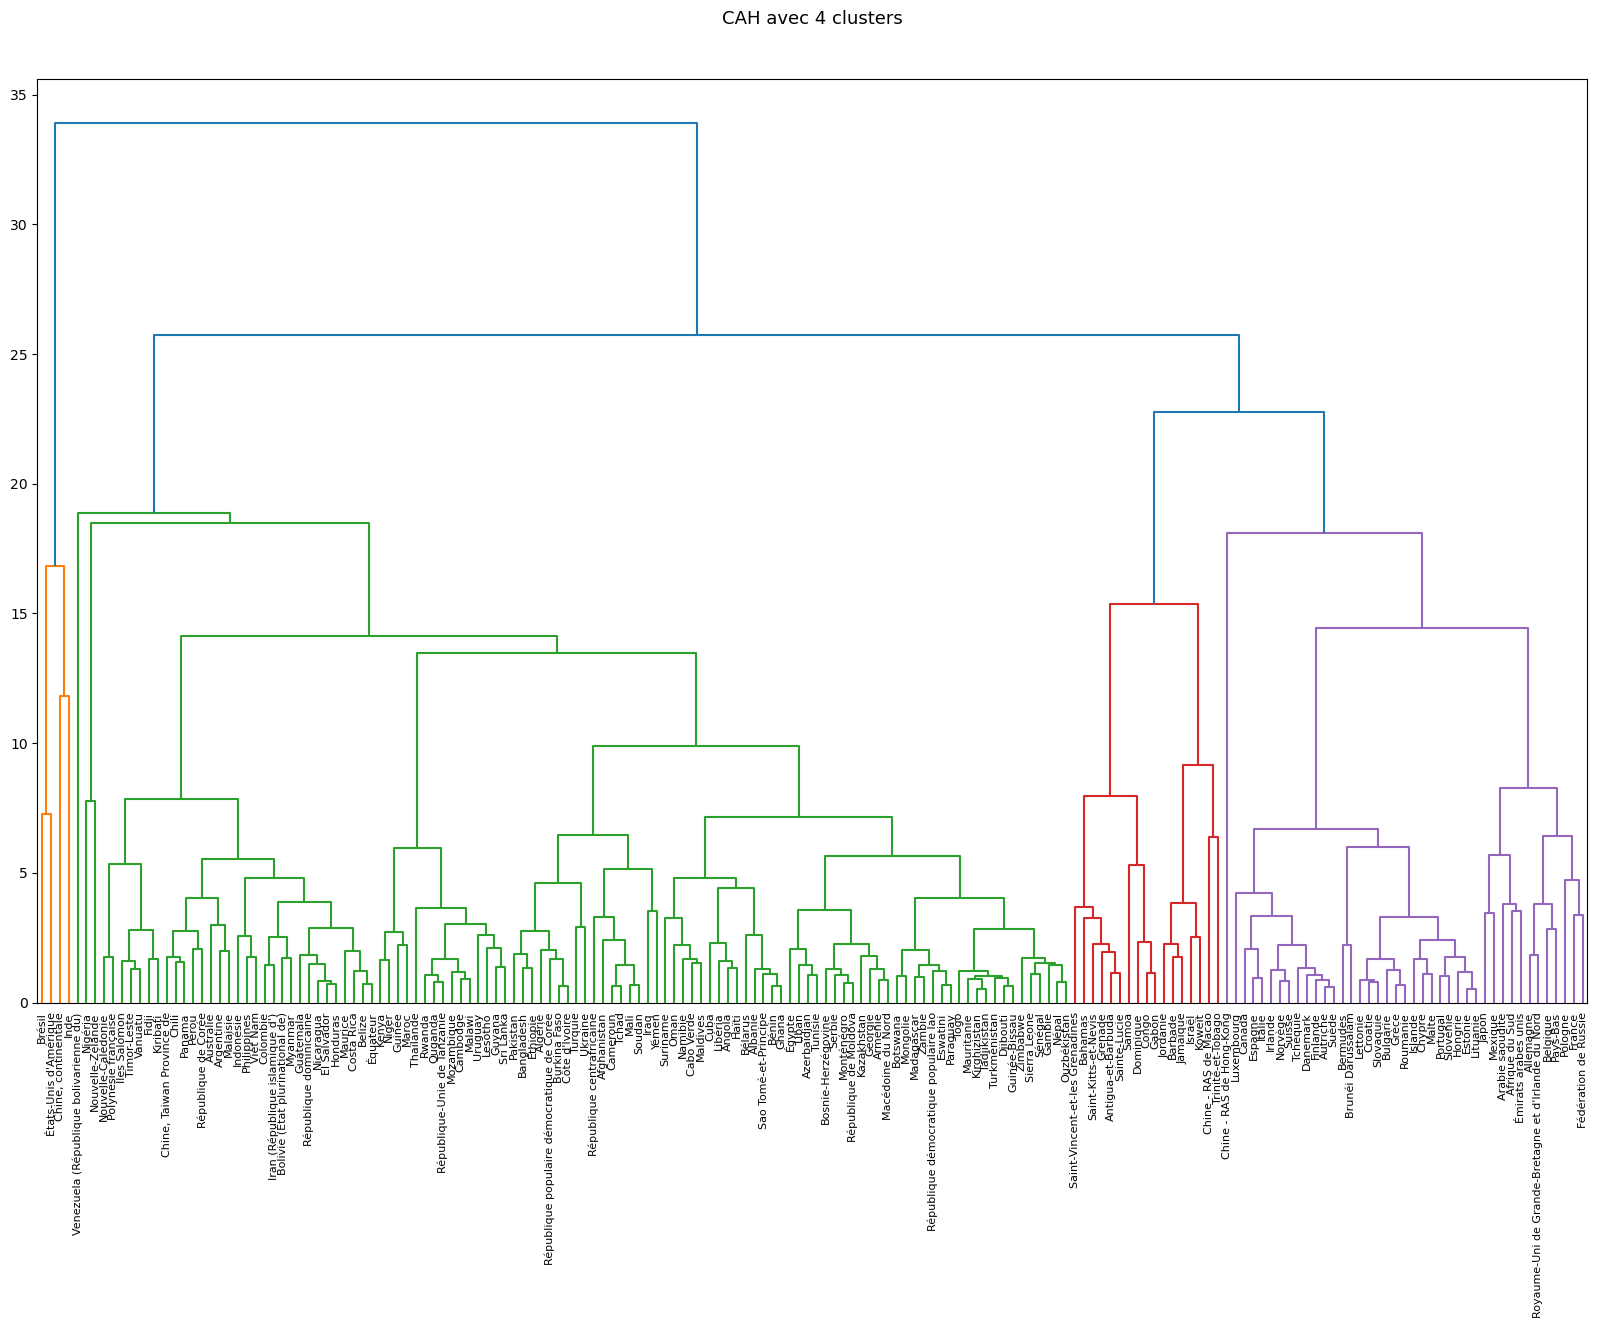

In [32]:
Z = linkage(bdd_scal,'ward')

plt.figure(figsize=(20,12))
plt.title('CAH avec 4 clusters',y=1.05,fontsize=13)

dendrogram(Z,labels=bdd_scal.index,leaf_font_size=8,color_threshold=20)

plt.show()

J'ai décidé de mettre la coupure à la distance = 20 pour obtenir 4 clusters, car en diminuant la distance (donc en augmentant le nombre de clusters) j'obtiens des clusters avec seulement un ou deux pays comme Venezuela, Hong-Kong, Chine & Inde, Brésil & États-Unis... ce qui n'est pas pertinent pour l'étude de clusterings

Je peux également regarder la clustermap pour afficher aussi un dendrogramme des variables 

In [33]:
clusterpalette = ['orange', 'green', 'red', 'purple']

<Figure size 640x480 with 0 Axes>

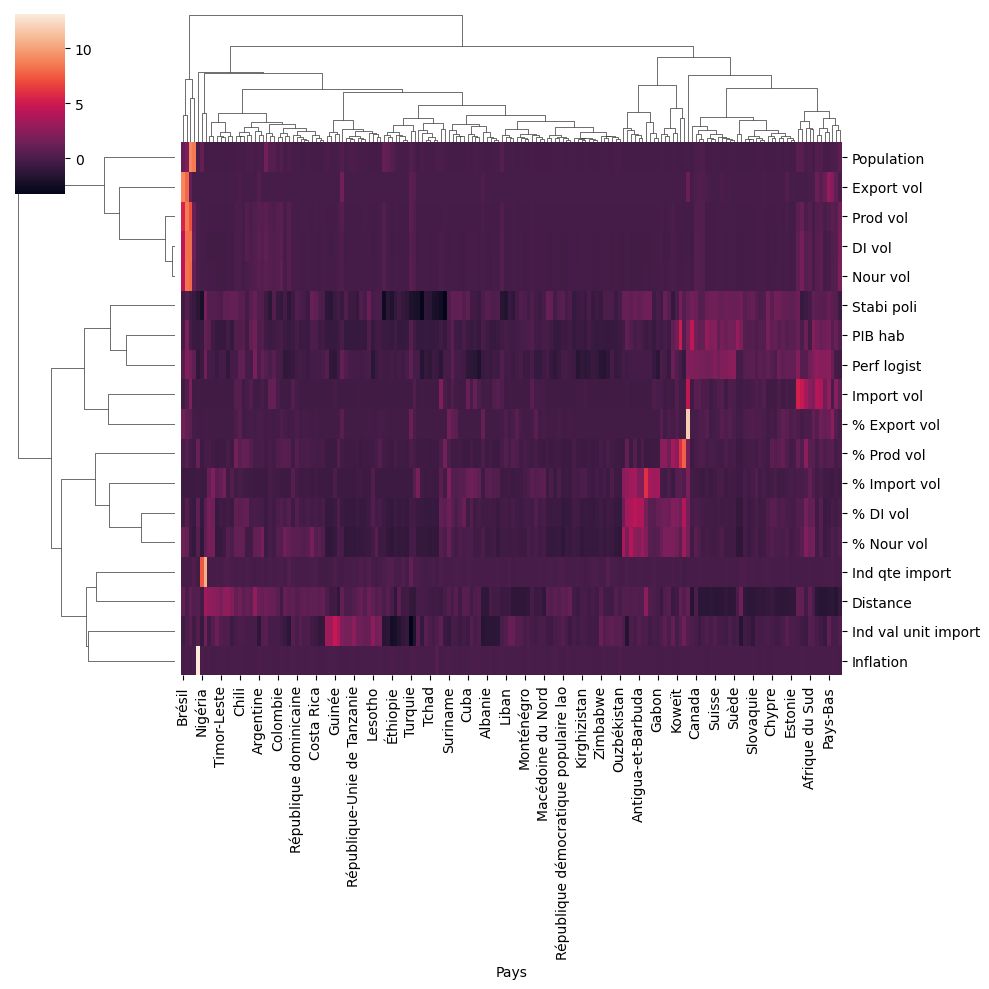

In [34]:
plt.figure()

sns.clustermap(bdd_scal.T,method='ward')

plt.show()

En prenant également un nombre de groupes = 4 pour mes variables, j'aurais les groupes suivant :

- Population, Export vol, Prod vol, DI vol, Nour vol


- Stabi poli, PIB hab, Perf logist, Import vol, % Export vol


- % Prod vol, % Import vol, % DI vol, % Nour vol


- Ind qte import, Distance, Ind val unit import, Inflation


Ces 4 groupes de variables devraient influencer fortement les caractéristiques des 4 clusters de pays (la moyenne de chaque variables des pays appartenant au cluster) que je vais maintenant regarder, ainsi que leur composition.

In [35]:
cah_cluster = fcluster(Z,t=20,criterion='distance')
bdd_scal['cah cluster'] = cah_cluster
bdd_scal['cah cluster'] = bdd_scal['cah cluster'].astype('category')
bdd_scal = bdd_scal.reset_index()
c1 = bdd_scal['cah cluster']==1
c2 = bdd_scal['cah cluster']==2
c3 = bdd_scal['cah cluster']==3
c4 = bdd_scal['cah cluster']==4
print('Groupe 1 -',len(bdd_scal[c1]),'pays :\n\n',bdd_scal['Pays'][c1].unique(),'\n\nGroupe 2 -',len(bdd_scal[c2]),'pays :\n\n',
      bdd_scal['Pays'][c2].unique(),'\n\nGroupe 3 -',len(bdd_scal[c3]),'pays :\n\n',bdd_scal['Pays'][c3].unique(),
     '\n\nGroupe 4 -',len(bdd_scal[c4]),'pays :\n\n',bdd_scal['Pays'][c4].unique())

Groupe 1 - 4 pays :

 ['Brésil' 'Chine, continentale' 'Inde' "États-Unis d'Amérique"] 

Groupe 2 - 112 pays :

 ['Afghanistan' 'Albanie' 'Algérie' 'Angola' 'Argentine' 'Arménie'
 'Australie' 'Azerbaïdjan' 'Bangladesh' 'Belize'
 'Bolivie (État plurinational de)' 'Bosnie-Herzégovine' 'Botswana'
 'Burkina Faso' 'Bélarus' 'Bénin' 'Cabo Verde' 'Cambodge' 'Cameroun'
 'Chili' 'Chine, Taiwan Province de' 'Colombie' 'Costa Rica' 'Cuba'
 "Côte d'Ivoire" 'Djibouti' 'El Salvador' 'Eswatini' 'Fidji' 'Gambie'
 'Ghana' 'Guatemala' 'Guinée' 'Guinée-Bissau' 'Guyana' 'Géorgie' 'Haïti'
 'Honduras' 'Indonésie' "Iran (République islamique d')" 'Iraq'
 'Kazakhstan' 'Kenya' 'Kirghizistan' 'Kiribati' 'Lesotho' 'Liban'
 'Libéria' 'Macédoine du Nord' 'Madagascar' 'Malaisie' 'Malawi' 'Maldives'
 'Mali' 'Maroc' 'Maurice' 'Mauritanie' 'Mongolie' 'Monténégro'
 'Mozambique' 'Myanmar' 'Namibie' 'Nicaragua' 'Niger' 'Nigéria'
 'Nouvelle-Calédonie' 'Nouvelle-Zélande' 'Népal' 'Oman' 'Ouganda'
 'Ouzbékistan' 'Pakistan' 'P

In [36]:
cah_cluster_mean = bdd_scal.groupby('cah cluster').mean().T
def rg(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

cah_cluster_mean_rg = cah_cluster_mean.style.applymap(rg).applymap(lambda v: 'opacity: 45%;' if (v < 0.5) and (v > -0.5) else None
                                          ).applymap(lambda v: 'opacity: 15%;' if (v < 0.25) and (v > -0.25) else None)
cah_cluster_mean_rg

cah cluster,1,2,3,4
Population,5.143408,-0.104054,-0.265165,-0.107604
DI vol,5.489228,-0.164551,-0.266734,0.024568
Nour vol,5.455272,-0.165894,-0.262372,0.029741
Prod vol,5.612359,-0.160777,-0.258432,-0.001198
Import vol,0.309171,-0.265586,-0.301365,0.820295
Export vol,4.449665,-0.181554,-0.223450,0.154489
% DI vol,-0.359868,-0.303853,2.237643,-0.062655
% Nour vol,0.188374,-0.293575,1.925824,-0.014928
% Prod vol,-0.116044,-0.239182,1.332680,0.112122
% Import vol,-0.636409,-0.178432,1.864441,-0.223548


On peut voir tout d'abord que la taille des clusters diffèrent énormément entre eux (allant de 2.4 % à 64.4 % du nombre total de pays)

Grâce au tableau ci-dessus, je vais pouvoir déterminer les caractéristiques principales (qui détermine à priori la composition du cluster) et secondaires de chaque clusters : 

&nbsp;

**Cluster 1**

Avec seulement 4 pays (2.4%), on remarque des caractéristiques principales bien marquées et très au largement supérieurs de celles des autres clusters (d'où son faible nombre le composant) pour :

- Population
- DI vol
- Nour vol
- Prod vol
- Export vol

On peut noter également en caractéristiques secondaires :

- Perf logist très élevé


- % Export vol élevé
- % Import vol faible


- Import vol légèrement élevé
- % DI vol légèrement faible
- Stabi poli légèrement faible
- Distance légèrement élevé

&nbsp;

**Cluster 2**

Avec 112 pays (64,4%), ce cluster présente des caractéristiques principales dont les valeurs faibles pour : 

- PIB hab
- Perf Logist
- Stabi poli

Avec pour caractéristiques secondaires :

- Import vol légèrement faible
- % DI vol légèrement faible
- % Nour vol légèrement faible
- Distance légèrement élevé

&nbsp;

**Cluster 3**

Avec 17 pays (10%), ce cluster présente des caractéristiques principales dont les valeurs sont élévés pour :

- % DI vol
- % Prod vol
- % Nour vol
- % Import vol


Avec pour caractéristiques secondaires :

- Stabi poli élevé


- PIB hab légèrement élevé
- Population légèrement faible
- DI vol légèrement faible
- Nour vol légèrement faible
- Prod vol légèrement faible
- Import vol légèrement faible

&nbsp;

**Cluster 4**

Avec 41 pays (23.6%), ce cluster présente des caratéristiques principales telles que :

- PIB hab très élevés
- Import vol élevé
- Distance faible

**Avec pour caractéristiques secondaires :**

- Perf logist très élevés

- % Export vol élevé
- Stabi poli élevé

Remarque : On notera que toutes les variables n'apparaissent pas forcément dans les caractérisques principales ou secondaires d'un groupe, c'est à dire qu'elles auront aucune influence sur la formation des clusters (Ind qte import, Ind val unit import et Inflation)

&nbsp;

Avec toutes ces informations (composition et caractéristiques), on peut profilier et résumer ces clusters tels que :

<font color='red'>**Cluster 1**</font> - Un tout petit groupe avec une population et des quantités en DI, nourriture, production et exportation de volailles très au dessus du reste du monde (on ne manquera de remarquer que ces 5 variables présentent de fortes, voire très fortes corrélations entre elles). On notera également que ces 4 pays font partie des 6 pays les plus peuplés du monde, et que leur taux d'importation est plutôt faible. On peut considérer ce cluster comme peu propice pour notre objectif de développement à l'international car il y aurait déjà un marché sur place abondant dans le commerce de la volaille, de plus la distance et la stabilité politique ne sont pas les plus favorables

<font color='red'>**Cluster 2**</font> - Celui-ci au contraire, regroupe énormément de pays. Ici, le PIB par habitant, la performance logistique et la stabilité sont faibles. On aurait un panel de pays plutôt pauvres et sous-développés et donc des populations qui n'ont pas forcément les moyens de consommer nos produits. De plus les conditions d'exportations semblent plutôt difficiles

<font color='red'>**Cluster 3**</font> - Avec peu de pays, ici on a affaire à des petits pays (par leur population), dont une majorité d'îles. Ses caractéristiques principales ne sont pas les plus intéressantes pour nous, les taux de DI, de production, d'importation et de nourriture sont élevés mais au vue de sa compostion, ce cluster n'est clairement pas idéal. Même si le développement pourrait se faire, la taille du marché étant trop peu conséquente pour s'y exporter, il n'est pas intéressant pour nous de se diriger vers ce cluster

<font color='green'>**Cluster 4**</font> - Ce dernier présente un nombre moyen de pays, dont une très grande majorité de pays européens (donc assez proches). Ici on a des pays avec un PIB par habitant et un indice de performance logistique très bons, donc plutot des pays riches et développés. On peut noter que la stabilité politique est favorable et que la quantité d'importation de volaille est importante. Pour ce cluster, on a 5 critères très intéressants pour notre objectif, il parait évident que c'est le cluster que l'on veut choisir pour déterminer le pays dans lequel on voudra s'implanter.

&nbsp;

Les profils de nos clusters étant établis et le choix du cluster final terminé, on peut tout de même visualiser la répartition et la variation au sein des clusters pour chaque variable 

In [37]:
box_cah_cluster = pd.melt(bdd_scal,id_vars=['Pays','cah cluster'])

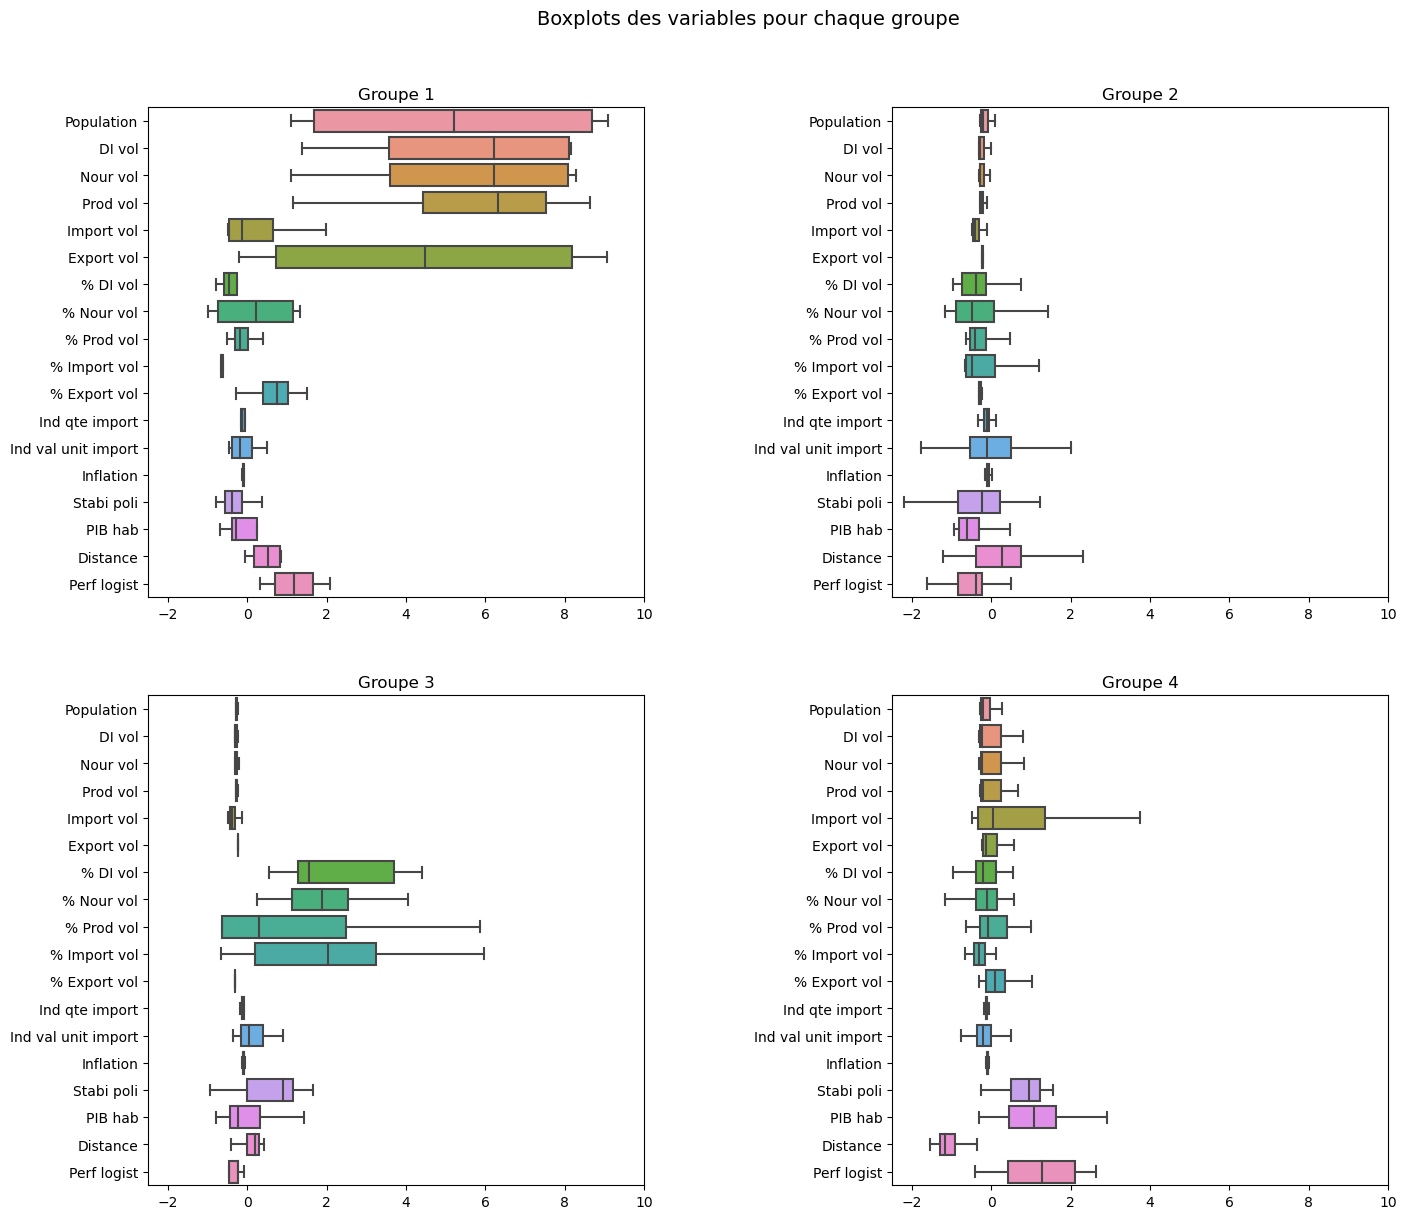

In [38]:
plt.figure(figsize=(16,14))
plt.suptitle('Boxplots des variables pour chaque groupe',fontsize=14,y=0.95)

plt.subplot(221,title='Groupe 1')
sns.boxplot(x='value',y='variable',data=box_cah_cluster[box_cah_cluster['cah cluster']==1],showfliers = False)
plt.xlabel('')
plt.ylabel('')
plt.xlim(-2.5,10)

plt.subplot(222,title='Groupe 2')
sns.boxplot(x='value',y='variable',data=box_cah_cluster[box_cah_cluster['cah cluster']==2],showfliers = False)
plt.xlabel('')
plt.ylabel('')
plt.xlim(-2.5,10)

plt.subplot(223,title='Groupe 3')
sns.boxplot(x='value',y='variable',data=box_cah_cluster[box_cah_cluster['cah cluster']==3],showfliers = False)
plt.xlabel('')
plt.ylabel('')
plt.xlim(-2.5,10)

plt.subplot(224,title='Groupe 4')
sns.boxplot(x='value',y='variable',data=box_cah_cluster[box_cah_cluster['cah cluster']==4],showfliers = False)
plt.xlabel('')
plt.ylabel('')
plt.xlim(-2.5,10)

plt.subplots_adjust(wspace=0.5,hspace=0.2)
plt.show()

Avec ces graphiques, on peut déceler quelques informations supplémentaires, notamment pour le groupe 4 où l'on peut voir qu'au sein du groupe se trouve les pays avec les plus grandes quantités d'importation de volailles, les PIB par habitant les plus élevés, ainsi que ceux qui présentent les meilleurs indices de performance logistique

On peut également comparer entre les clusters leur répartition et variation pour chacune des variables

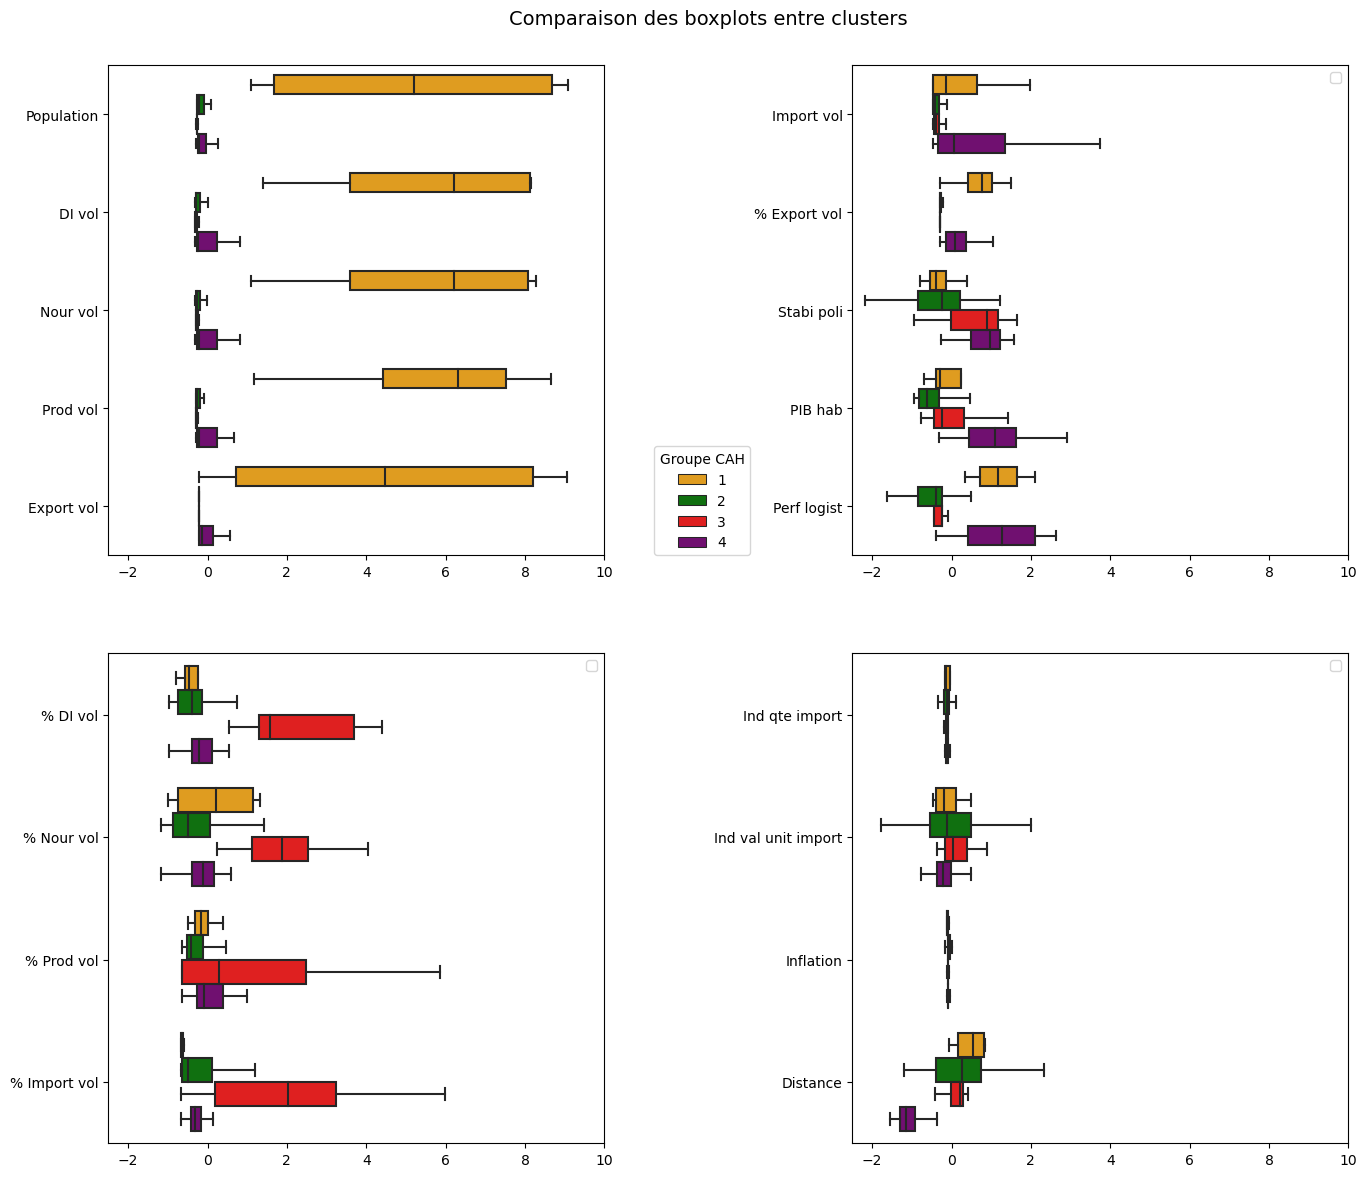

In [39]:
bgc1 = box_cah_cluster.loc[box_cah_cluster['variable'].isin(['DI vol','Nour vol','Prod vol','Export vol','Population'])]
bgc2 = box_cah_cluster.loc[box_cah_cluster['variable'].isin(['Stabi poli','PIB hab','Perf logist','Import vol','% Export vol'])]
bgc4 = box_cah_cluster.loc[box_cah_cluster['variable'].isin(['Distance','Inflation','Ind val unit import','Ind qte import'])]
bgc3 = box_cah_cluster.loc[box_cah_cluster['variable'].isin(['% Prod vol','% Import vol','% DI vol','% Nour vol'])]

plt.figure(figsize=(16,14))
plt.suptitle('Comparaison des boxplots entre clusters',fontsize=14,y=0.92)

plt.subplot(221)
sns.boxplot(y='variable',x='value',data=bgc1,hue='cah cluster',showfliers = False,palette=clusterpalette)
plt.legend(title='Groupe CAH',loc=(1.1,0))
plt.xlabel('')
plt.ylabel('')
plt.xlim(-2.5,10)

plt.subplot(222)
sns.boxplot(y='variable',x='value',data=bgc2,hue='cah cluster',showfliers = False,palette=clusterpalette)
plt.legend('')
plt.xlabel('')
plt.ylabel('')
plt.xlim(-2.5,10)

plt.subplot(223)
sns.boxplot(y='variable',x='value',data=bgc3,hue='cah cluster',showfliers = False,palette=clusterpalette)
plt.legend('')
plt.xlabel('')
plt.ylabel('')
plt.xlim(-2.5,10)

plt.subplot(224)
sns.boxplot(y='variable',x='value',data=bgc4,hue='cah cluster',showfliers = False,palette=clusterpalette)
plt.legend('')
plt.xlabel('')
plt.ylabel('')
plt.xlim(-2.5,10)

plt.subplots_adjust(wspace=0.5,hspace=0.2)
plt.show()

Pour ces graphiques, j'ai fait le choix de mettre par graphique les variables correspondant aux groupes que l'on avait observé sur la clustermap

On peut voir que pour chaque groupe de variable, on a un cluster de pays qui se détache, en 1er le groupe 1, en 2ème le groupe 4, en 3ème le groupe 3 et en 4ème le groupe 2 avec des dispersions et des valeurs plus élevés que pour les autres clusters

&nbsp;

# <font color=#2921CA> II - Méthode des K-means

&nbsp;

Je vais utiliser une autre méthode clustering, dite des K-means, et nous pourrons comparer les résultats que nous donnera cette méthode avec la CAH, ainsi que comparer la qualité des 2 méthodes    

In [40]:
bdd_scal.head()

,Pays,Population,DI vol,Nour vol,Prod vol,Import vol,Export vol,% DI vol,% Nour vol,% Prod vol,% Import vol,% Export vol,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist,cah cluster
0,Afghanistan,-0.039893,-0.284889,-0.278446,-0.273892,-0.316991,-0.225781,-0.748298,-0.994729,-0.524349,-0.488466,-0.302594,-0.197087,-0.923926,-0.064168,-3.075300,-0.880146,-0.124808,-1.618032,2
1,Afrique du Sud,0.096555,0.670166,0.660866,0.393944,2.312347,-0.087086,0.882213,1.398001,0.473339,0.895362,0.076272,-0.074861,0.386369,-0.078000,-0.258620,-0.320314,0.823604,1.382241,4
2,Albanie,-0.259989,-0.289523,-0.282241,-0.280004,-0.268199,-0.225781,-0.405640,-0.647099,-0.494307,0.512673,-0.302594,-0.168713,-1.327093,-0.092211,0.479082,-0.371986,-1.144207,-0.657236,2
3,Algérie,-0.006343,-0.182942,-0.179296,-0.173248,-0.463367,-0.225781,-0.611602,-0.845129,-0.166767,-0.659748,-0.302594,-0.072678,-2.183824,-0.095948,-0.973967,-0.421015,-1.210242,-0.513114,2
4,Allemagne,0.265511,0.494540,0.458772,0.331602,4.090539,1.196391,-0.387755,-0.340037,-0.223802,-0.316628,0.422141,-0.109783,-0.167986,-0.089109,0.713806,1.539697,-1.328991,2.626443,4


In [41]:
bdd_scal = bdd_scal.set_index('Pays')
acp4 = dec.PCA(n_components=4)
acp4.fit(bdd_scal.drop(columns='cah cluster'))
bdd_acp4 = acp4.transform(bdd_scal.drop(columns='cah cluster'))
cls4 = cls.KMeans(n_clusters=4,init='k-means++',random_state=0)
cls4.fit(bdd_scal.drop(columns='cah cluster'))
centroids = cls4.cluster_centers_
centroids_scal = pre.StandardScaler().fit_transform(centroids)
centroids_proj = acp4.transform(centroids_scal)
centroids_proj = pd.DataFrame(centroids_proj,index=['cluster 3','cluster 2','cluster 4','cluster 1'],columns=['PC1','PC2','PC3','PC4'])
bdd_scal['kmeans cluster'] = cls4.labels_
centroids_proj_rg = centroids_proj.style.applymap(rg).applymap(lambda v: 'opacity: 45%;' if (v < 0.5) and (v > -0.5) else None
                                          ).applymap(lambda v: 'opacity: 15%;' if (v < 0.25) and (v > -0.25) else None)
centroids_proj_rg

C:\Users\narab\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,PC1,PC2,PC3,PC4
cluster 3,-1.438696,2.666253,2.240431,1.126279
cluster 2,-2.431661,-2.458847,0.912898,-0.794390
cluster 4,-0.226453,1.042346,-3.126134,-0.272403
cluster 1,4.096811,-1.249753,-0.027195,-0.059485


Ci-dessus, on a un dataframe avec les caractéritisques des centroïdes des 4 clusters du K-means. Ils sont exprimés en fonction des composantes principales liées à l'ACP pour lesquelles nous verrons leur caractéristation en fonction des variables plus tard, dans la partie ACP

Tout de même on observe qu'ils ont bien des caractéristiques disctinctes avec pour :

Cluster 3 - PC2, PC3 très élevé, PC4 élevé et PC1 faible

Cluster 2 - PC1, PC2 très faible, PC3 élevé  et PC4 faible

Cluster 4 - PC3 très faible, PC2 élevé

Cluster 1- PC1 très fortement élevé et PC2 faible

In [42]:
bdd_scal.replace({'kmeans cluster': {0:3,1:2,2:4,3:1}},inplace=True)
cah_color_map = {1 :'orange',2:'green',3:'red',4:'purple'}
cah_color = [cah_color_map[l] for l in cah_cluster]
kmeans_color_map = {3 :'orange',1:'green',0:'red',2:'purple'}
kmeans_color = [kmeans_color_map[l] for l in cls4.labels_]
centroids_proj['cah cluster'] = [3,2,4,1]
centroids_color_map = {1 :'orange',2:'green',3:'red',4:'purple'}
centroids_color = [cah_color_map[l] for l in centroids_proj['cah cluster']]

C:\Users\narab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


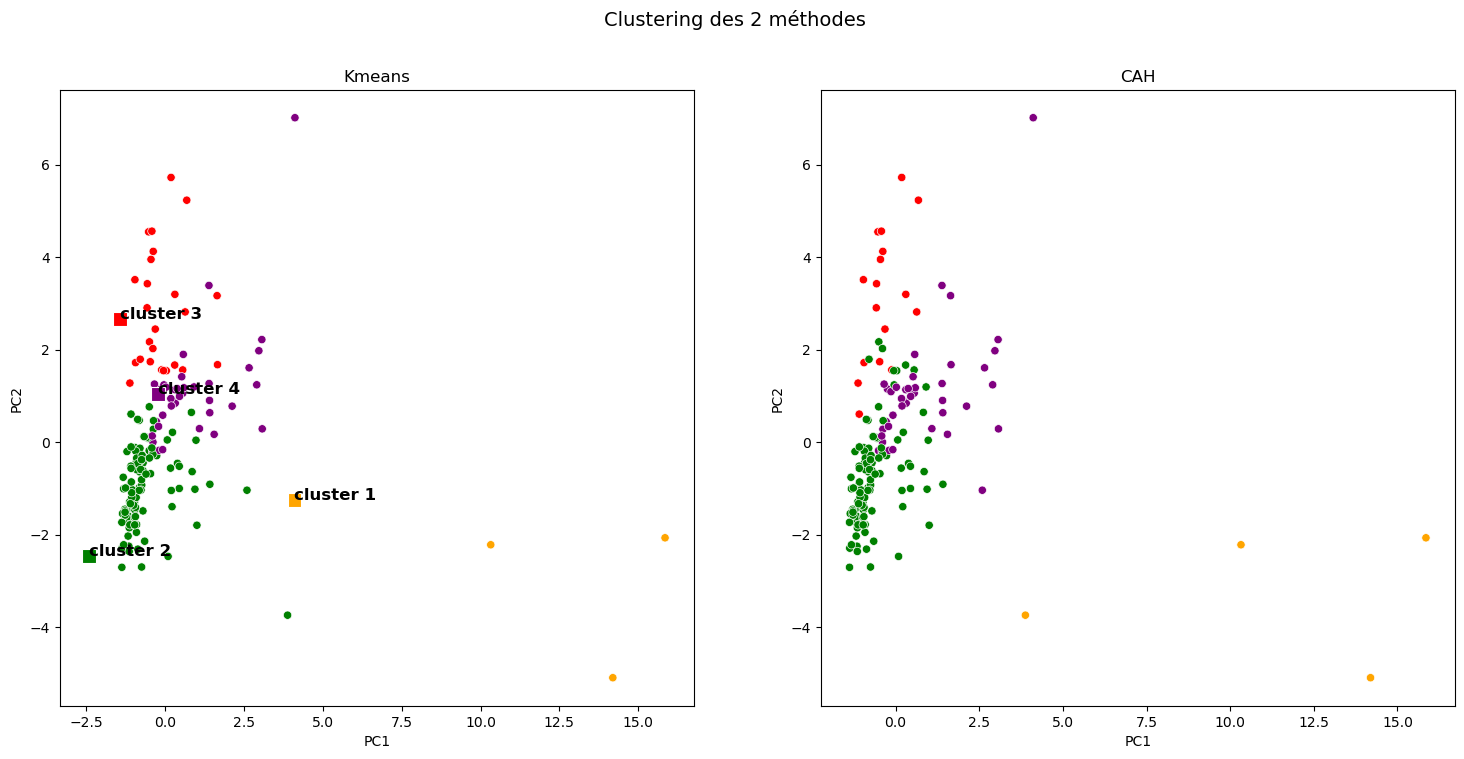

In [43]:
plt.figure(figsize=(18,8))
plt.suptitle('Clustering des 2 méthodes',fontsize=14)

plt.subplot(121,title='Kmeans')
sns.scatterplot(x=bdd_acp4[:,0],y=bdd_acp4[:,1],c=kmeans_color) 

sns.scatterplot(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],marker="s",s=100,c=centroids_color)
for i, (x,y) in enumerate(zip(centroids_proj.iloc[:, 0],centroids_proj.iloc[:, 1])):
    plt.text(x,y,centroids_proj.index[i],size=12,fontweight='bold')

    
    
plt.subplot(122,title='CAH')
sns.scatterplot(x=bdd_acp4[:,0],y=bdd_acp4[:,1], c=cah_color)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

En comparant les nuages de points des clusters trouvés par la méthode du K-means et la CAH, on peut voir que globalement nos clusters sont situés aux mêmes endroits. Toutefois, on peut repérer quelques différences, notamment sur le petit cluster (celui avec les points excentrés en bas à droite) pour lequel il n'y a plus que 3 pays au lieu de 4. Également, le gros cluster possède moins d'éléments que celui de la CAH (tous ceux situés en haut au niveau des points rouges ou violets). Pour les 2 derniers clusters on aperçoit aussi quelques différences 

Ceci n'est qu'un aspect visuel, en regardant la compostion des clusters du K-means on pourra mieux noter la différence entre les 2 méthodes 

In [44]:
bdd_scal = bdd_scal.reset_index()
ck1 = bdd_scal['kmeans cluster']==0
ck2 = bdd_scal['kmeans cluster']==1
ck3 = bdd_scal['kmeans cluster']==2
ck4 = bdd_scal['kmeans cluster']==3

In [45]:
print('Groupe 1 -',len(bdd_scal[ck4]),'pays :\n\n',bdd_scal['Pays'][ck4].unique(),'\n\nGroupe 2 -',len(bdd_scal[ck2]),'pays :\n\n',bdd_scal['Pays'][ck2].unique(),
     '\n\nGroupe 3 -',len(bdd_scal[ck1]),'pays :\n\n',bdd_scal['Pays'][ck1].unique(),'\n\nGroupe 4 -',len(bdd_scal[ck3]),'pays :\n\n',bdd_scal['Pays'][ck3].unique())

Groupe 1 - 25 pays :

 ['Afrique du Sud' 'Antigua-et-Barbuda' 'Arabie saoudite' 'Bahamas'
 'Barbade' 'Chili' 'Chine - RAS de Macao' 'Chine, Taiwan Province de'
 'Dominique' 'Gabon' 'Grenade' 'Israël' 'Jamaïque' 'Jordanie' 'Koweït'
 'Nouvelle-Calédonie' 'Nouvelle-Zélande' 'Panama' 'Polynésie française'
 'Saint-Kitts-et-Nevis' 'Saint-Vincent-et-les Grenadines' 'Sainte-Lucie'
 'Samoa' 'Suriname' 'Trinité-et-Tobago'] 

Groupe 2 - 3 pays :

 ['Brésil' 'Chine, continentale' "États-Unis d'Amérique"] 

Groupe 3 - 0 pays :

 [] 

Groupe 4 - 108 pays :

 ['Afghanistan' 'Albanie' 'Algérie' 'Angola' 'Argentine' 'Arménie'
 'Azerbaïdjan' 'Bangladesh' 'Belize' 'Bolivie (État plurinational de)'
 'Bosnie-Herzégovine' 'Botswana' 'Brunéi Darussalam' 'Bulgarie'
 'Burkina Faso' 'Bélarus' 'Bénin' 'Cabo Verde' 'Cambodge' 'Cameroun'
 'Colombie' 'Congo' 'Costa Rica' 'Cuba' "Côte d'Ivoire" 'Djibouti'
 'El Salvador' 'Eswatini' 'Fidji' 'Fédération de Russie' 'Gambie' 'Ghana'
 'Guatemala' 'Guinée' 'Guinée-Bissau' 

En effet on peut noter quelques différences :

- Le groupe 1 est passé de 4 à 3 pays

- Le groupe 2 est passé de 112 à 108 pays

- Le groupe 3 est passé de 17 à 25 pays

- Le groupe 4 est passé de 41 à 38 pays

In [46]:
kmeans_cluster_mean = bdd_scal.groupby('kmeans cluster').mean().T
def rg(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

kmeans_cluster_mean_rg = kmeans_cluster_mean.style.applymap(rg).applymap(lambda v: 'opacity: 45%;' if (v < 0.5) and (v > -0.5) else None
                                          ).applymap(lambda v: 'opacity: 15%;' if (v < 0.25) and (v > -0.25) else None)

kmeans_cluster_mean_rg

kmeans cluster,1,2,3,4
Population,4.011434,-0.011237,-0.233469,-0.131156
DI vol,6.857244,-0.136242,-0.182553,-0.034046
Nour vol,6.906343,-0.140259,-0.177911,-0.029560
Prod vol,7.096757,-0.137187,-0.200646,-0.038366
Import vol,0.570298,-0.262025,-0.029011,0.718766
Export vol,6.005212,-0.180833,-0.204470,0.174372
% DI vol,-0.217426,-0.401493,1.896920,-0.089723
% Nour vol,0.583673,-0.401273,1.749235,-0.056431
% Prod vol,0.012698,-0.283966,1.144391,0.053170
% Import vol,-0.627705,-0.199532,1.321777,-0.252942


Les valeurs sont forcément différentes, mais les caractéristiques principales des clusters restent les mêmes et dans la globalité les caractéristiques secondaires aussi (il se peut qu'il y en une ou deux en moins ou en plus pour un cluster mais cela n'a pas une grande importance) 

## <font color=#2921CA>III - Comparaison des groupes CAH et Kmeans

Ci-dessous la liste des pays n'appartenant pas aux mêmes clusters pour la CAH et le Kmeans :

In [47]:
print('Groupe 1 CAH :',bdd_scal['Pays'].loc[(bdd_scal['kmeans cluster']!=1)&(bdd_scal['cah cluster']==1)])

Groupe 1 CAH : 68    Inde
Name: Pays, dtype: object


In [48]:
print('Groupe 2 CAH :',bdd_scal['Pays'].loc[(bdd_scal['kmeans cluster']!=2)&(bdd_scal['cah cluster']==2)])

Groupe 2 CAH : 10                     Australie
32                         Chili
35     Chine, Taiwan Province de
110           Nouvelle-Calédonie
111             Nouvelle-Zélande
113                         Oman
117                       Panama
122          Polynésie française
147                     Suriname
Name: Pays, dtype: object


In [49]:
print('Groupe 3 CAH :',bdd_scal['Pays'].loc[(bdd_scal['kmeans cluster']!=3)&(bdd_scal['cah cluster']==3)])

Groupe 3 CAH : 39    Congo
Name: Pays, dtype: object


In [50]:
print('Groupe 4 CAH :',bdd_scal['Pays'].loc[(bdd_scal['kmeans cluster']!=4)&(bdd_scal['cah cluster']==4)])

Groupe 4 CAH : 1           Afrique du Sud
7          Arabie saoudite
22       Brunéi Darussalam
24                Bulgarie
54    Fédération de Russie
Name: Pays, dtype: object


On peut voir les pays qui ont disparu des groupes de la CAH avec la méthode des K-means. Par exemple notre groupe 4 en a perdu 5, ce qui veut dire qu'il en a aussi récupérer 2 autres

Ce qui me semble pertinent pour le choix d'un groupe final, c'est de tout simplement sélectionner tous les pays en commun entre les 2 groupes des 2 méthodes

In [51]:
groupe_final = bdd_scal['Pays'].loc[(bdd_scal['kmeans cluster']==4)&(bdd_scal['cah cluster']==4)]

In [52]:
print('Groupe 4 CAH & groupe 1 Kmeans -',len(groupe_final),' Pays en commun :\n\n',groupe_final)

Groupe 4 CAH & groupe 1 Kmeans - 36  Pays en commun :

 4                                              Allemagne
11                                              Autriche
16                                              Belgique
18                                              Bermudes
31                                                Canada
33                              Chine - RAS de Hong-Kong
37                                                Chypre
41                                               Croatie
44                                              Danemark
48                                               Espagne
49                                               Estonie
52                                              Finlande
53                                                France
59                                                 Grèce
67                                               Hongrie
72                                               Irlande
73                              

### Rand Score Ajusté

Cette mesure permet de calculer la cohérence entre 2 groupes, je vais pouvoir ainsi calculer pour voir à quel degré les 2 méthodes nous donnent des résultats semblables

In [53]:
cah_cluster = fcluster(Z,t=20,criterion='distance')
bdd_scal['cah cluster'] = cah_cluster
bdd_scal['kmeans cluster'] = cls4.labels_

In [54]:
bdd_scal.head()

,Pays,Population,DI vol,Nour vol,Prod vol,Import vol,Export vol,% DI vol,% Nour vol,% Prod vol,...,% Export vol,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist,cah cluster,kmeans cluster
0,Afghanistan,-0.039893,-0.284889,-0.278446,-0.273892,-0.316991,-0.225781,-0.748298,-0.994729,-0.524349,...,-0.302594,-0.197087,-0.923926,-0.064168,-3.075300,-0.880146,-0.124808,-1.618032,2,1
1,Afrique du Sud,0.096555,0.670166,0.660866,0.393944,2.312347,-0.087086,0.882213,1.398001,0.473339,...,0.076272,-0.074861,0.386369,-0.078000,-0.258620,-0.320314,0.823604,1.382241,4,0
2,Albanie,-0.259989,-0.289523,-0.282241,-0.280004,-0.268199,-0.225781,-0.405640,-0.647099,-0.494307,...,-0.302594,-0.168713,-1.327093,-0.092211,0.479082,-0.371986,-1.144207,-0.657236,2,1
3,Algérie,-0.006343,-0.182942,-0.179296,-0.173248,-0.463367,-0.225781,-0.611602,-0.845129,-0.166767,...,-0.302594,-0.072678,-2.183824,-0.095948,-0.973967,-0.421015,-1.210242,-0.513114,2,1
4,Allemagne,0.265511,0.494540,0.458772,0.331602,4.090539,1.196391,-0.387755,-0.340037,-0.223802,...,0.422141,-0.109783,-0.167986,-0.089109,0.713806,1.539697,-1.328991,2.626443,4,2


In [55]:
adjusted_rand_score(bdd_scal['kmeans cluster'],bdd_scal['cah cluster'])

0.7466380906493052

Le rand score ajusté global est de 0.75 ce qui signifie une cohérence moyennement bonne

### Méthode du coude

Cette méthode consiste à visualiser une courbe, indiquant pour chaque K la somme de la variance intraclusters, puis d'observer un "coude" qui indiquerait le bon nombre de cluster à utiliser

In [56]:
bdd_scal.set_index('Pays',inplace=True)
bdd_scal.drop(columns={'cah cluster','kmeans cluster'},inplace = True)

In [57]:
cls_range = np.arange(2,11,1)
inertie = []

for c in cls_range:
    kmeans = cls.KMeans(init='k-means++',n_clusters=c,random_state=0).fit(bdd_scal)
    inertie.append(kmeans.inertia_)

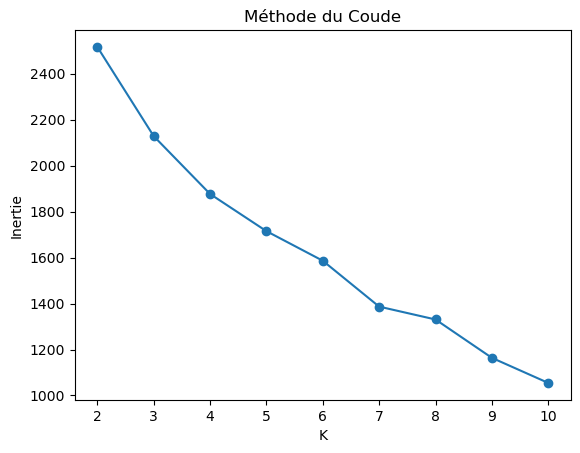

In [58]:
plt.figure()
plt.title('Méthode du Coude')

plt.plot(cls_range,inertie,marker = 'o')
plt.xlabel('K')
plt.ylabel('Inertie')

plt.show()

D'après cette méthode K = 4 ne serait pas forcément le nombre de cluster (il n'y a pas de coude identifiable), mais plutôt K = 7, par contre celui n'était vraiment pas optimal pour la CAH

### Méthode du coefficient de silhouette

Cette méthode consiste a également visualer sur une courbe, indiquant pour chaque K son coeffeficient de silouhette (mesurant la qualité d'une partition), sur laquelle il faut tou simplement prendre les K où la valeur est la  plus élevée 

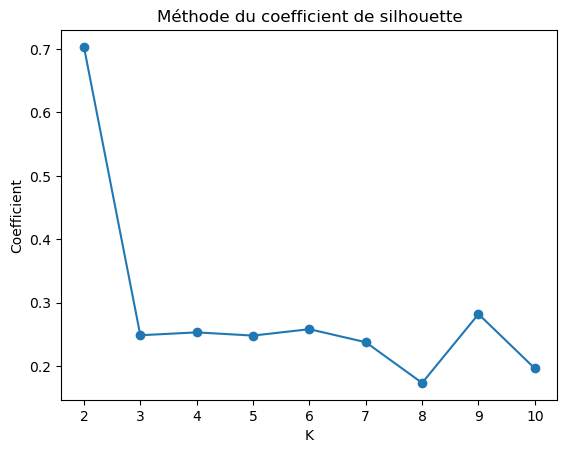

In [59]:
cls_range = np.arange(2,11,1)
inertie = []

for c in cls_range:
    kmeans = cls.KMeans(init='k-means++',n_clusters=c,random_state=0).fit(bdd_scal)
    silh = met.silhouette_score(bdd_scal, kmeans.labels_)
    inertie.append(silh)

plt.figure()
plt.title('Méthode du coefficient de silhouette')
    
plt.plot(cls_range, inertie, marker ='o')
plt.xlabel('K')
plt.ylabel('Coefficient')

plt.show()

Encore une fois K = 2 est de loin la meilleur solution, puis ensuite on a K = 9 qui serait la meilleure la solution. Encore une fois K = 4 n'est pas considérer comme le nombre optimal

### Davies Bouldin

L'indice de Davies-Bouldin sert à mesurer l'homogénéité et la séparabilité des clusters (plus l'indice est petit, meilleure est la qualité)

Text(0, 0.5, 'Indice')

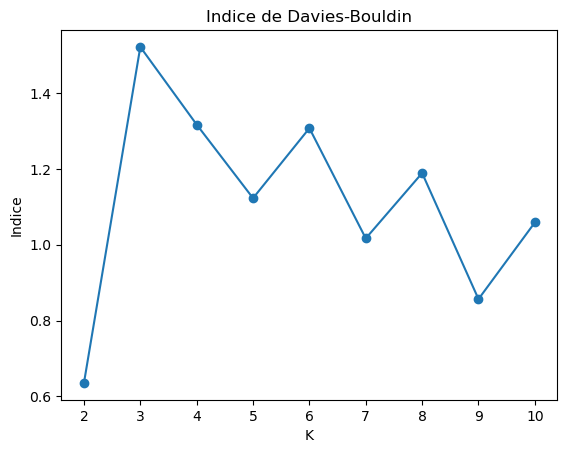

In [62]:
cls_range = np.arange(2,11,1)
db = []

for c in cls_range:
    kmeans = cls.KMeans(init='k-means++',n_clusters=c,random_state=0).fit(bdd_scal)
    davies = met.davies_bouldin_score(bdd_scal, kmeans.labels_)
    db.append(davies)
    
plt.figure()
plt.title('Indice de Davies-Bouldin')
plt.plot(cls_range, db, marker ='o')
plt.xlabel('K')
plt.ylabel('Indice')

En ce qui concerne l'homogénéité des clusters, on a clairement K = 2 clusters qui seraient le meilleur choix de clustering, ensuite on retrouve le K = 7 comme 2nd choix, par contre K = 4 est le 2ème pire résultat après K = 3

### Conclusion des résultats

Pour la CAH, la séparation en 4 clusters semble la plus optimale, auquel cas on aurait eut des des clusters avec seulement 1 ou 2 pays, cependant pour la méthode des K-means, on a pu voir que K = 4 est loin d'être le choix optimal (K = 2,7 ou 9 étant de meilleurs choix).

Comme le K-means donne des résultats plus ou moins aléatoires en fonction de son initialisation, il est possible que K = 4 ait de meilleurs résultats sur d'autres exécutions

En ce qui concerne les résultats des 2 méthodes pour une séparation en 4 clusters, on a observé quelques différences mais globalement la cohérence entre les 2 résultats est bonne

Comme K = 4 n'est pas recommandé par les différentes méthodes de choix de nombre de clusters, dans le cas de cette étude, la CAH semble plus pertinent que la K-means

# <font color=#2921CA> III - ACP

Maintenat on va se pencher sur l'ACP et notamment sur la visualisation des plans factiorelles des 4 composantes principales (PC)

Tout d'abord, je vais regarder la variance expliqué le % variance expliquée par nos 4 PC

In [63]:
bdd_scal.head()

,Population,DI vol,Nour vol,Prod vol,Import vol,Export vol,% DI vol,% Nour vol,% Prod vol,% Import vol,% Export vol,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
Pays,,,,,,,,,,,,,,,,,,
Afghanistan,-0.039893,-0.284889,-0.278446,-0.273892,-0.316991,-0.225781,-0.748298,-0.994729,-0.524349,-0.488466,-0.302594,-0.197087,-0.923926,-0.064168,-3.075300,-0.880146,-0.124808,-1.618032
Afrique du Sud,0.096555,0.670166,0.660866,0.393944,2.312347,-0.087086,0.882213,1.398001,0.473339,0.895362,0.076272,-0.074861,0.386369,-0.078000,-0.258620,-0.320314,0.823604,1.382241
Albanie,-0.259989,-0.289523,-0.282241,-0.280004,-0.268199,-0.225781,-0.405640,-0.647099,-0.494307,0.512673,-0.302594,-0.168713,-1.327093,-0.092211,0.479082,-0.371986,-1.144207,-0.657236
Algérie,-0.006343,-0.182942,-0.179296,-0.173248,-0.463367,-0.225781,-0.611602,-0.845129,-0.166767,-0.659748,-0.302594,-0.072678,-2.183824,-0.095948,-0.973967,-0.421015,-1.210242,-0.513114
Allemagne,0.265511,0.494540,0.458772,0.331602,4.090539,1.196391,-0.387755,-0.340037,-0.223802,-0.316628,0.422141,-0.109783,-0.167986,-0.089109,0.713806,1.539697,-1.328991,2.626443


In [64]:
acp4 = dec.PCA(n_components=4)
acp4.fit(bdd_scal)
print('Somme des variances expliquées pour les 4 principales composantes :',acp4.explained_variance_ratio_.cumsum(),
      '\n\nVariance expliquée par les 4 principales composantes :',acp4.explained_variance_ratio_)
bdd_acp4 = acp4.transform(bdd_scal)

Somme des variances expliquées pour les 4 principales composantes : [0.24394355 0.41758071 0.53269653 0.60269092] 

Variance expliquée par les 4 principales composantes : [0.24394355 0.17363716 0.11511582 0.06999439]


Il existe un critère de Kaiser tel que : Si la variance expliquée  par une composante est supérieur à 1 / nb de variables, alors on peut analyser cette composante'

In [65]:
1/18

0.05555555555555555

Nos 4 PC ont bien une variance expliquée > 0.056 donc on pourra toutes les analyser

In [66]:
acp10 = dec.PCA(n_components=10)
acp10.fit(bdd_scal)
list_acp = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10"]
df_acp = pd.DataFrame(list_acp, columns = ["ACP"])
df_acp['explained_variance'] = acp10.explained_variance_ratio_

Text(0, 0.5, 'Var cum')

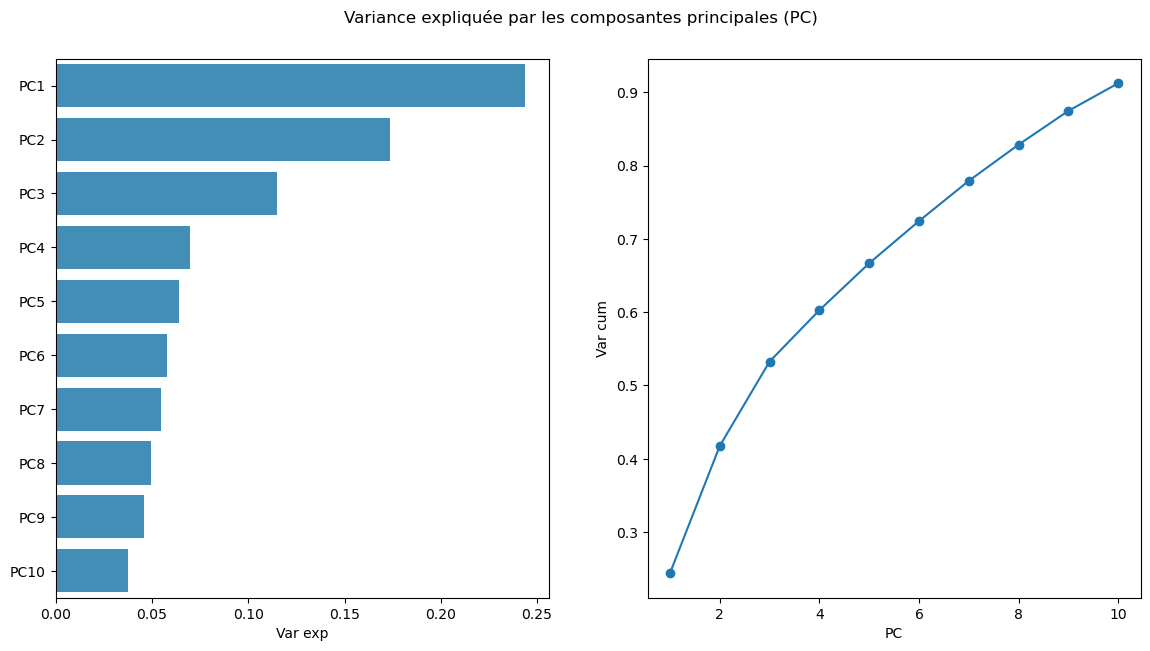

In [67]:
plt.figure(figsize=(14,7))
plt.suptitle('Variance expliquée par les composantes principales (PC)',y=0.95)

plt.subplot(121)
sns.barplot(x="explained_variance", y="ACP", data=df_acp,label="Total",color='#2F94CA')
plt.xlabel('Var exp')
plt.ylabel('')

plt.subplot(122)
plt.plot(np.arange(1,11,1),acp10.explained_variance_ratio_.cumsum(),marker='o')
plt.xlabel('PC')
plt.ylabel('Var cum')

On a un réel gap entre la 3e et la 4e PC, ensuite la  différence de variance expliquée entre chacune devient très faible 

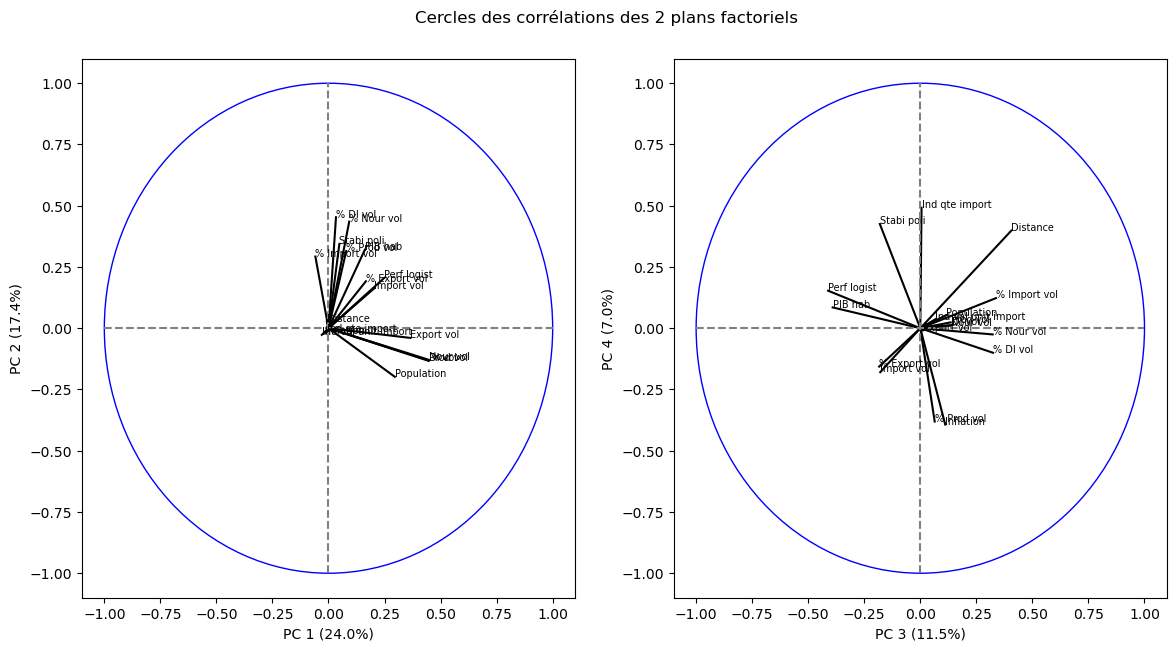

In [68]:
pcs = acp4.components_

plt.figure(figsize=(14,7))
plt.suptitle('Cercles des corrélations des 2 plans factoriels',y=0.95)

plt.subplot(121)
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, bdd.columns[i], fontsize='7')

plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')
plt.xlabel('PC 1 (24.0%)')
plt.ylabel('PC 2 (17.4%)')
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.subplot(122)
for i, (x, y) in enumerate(zip(pcs[2, :], pcs[3, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, bdd.columns[i], fontsize='7')

plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')
plt.xlabel('PC 3 (11.5%)')
plt.ylabel('PC 4 (7.0%)')
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))
plt.show()

Sur les 2 plans factoriels, aucune variable ne dépasse les 0.5, PC 1 présente que des "corrélations positives

In [69]:
print('Composition des PC en fonction des variables :')
for i in np.arange(0,4,1):
    print("\nPC",i+1,":\n")
    for j in np.arange(0,18,1):
        print(bdd.columns[j],'=',round(pcs[i,j],2))

Composition des PC en fonction des variables :

PC 1 :

Population = 0.3
DI vol = 0.45
Nour vol = 0.45
Prod vol = 0.45
Import vol = 0.2
Export vol = 0.37
% DI vol = 0.03
% Nour vol = 0.09
% Prod vol = 0.08
% Import vol = -0.06
% Export vol = 0.17
Ind qte import = -0.01
Ind val unit import = -0.03
Inflation = -0.02
Stabi poli = 0.05
PIB hab = 0.16
Distance = -0.01
Perf logist = 0.25

PC 2 :

Population = -0.2
DI vol = -0.13
Nour vol = -0.13
Prod vol = -0.13
Import vol = 0.16
Export vol = -0.04
% DI vol = 0.45
% Nour vol = 0.44
% Prod vol = 0.31
% Import vol = 0.29
% Export vol = 0.19
Ind qte import = -0.01
Ind val unit import = -0.03
Inflation = -0.02
Stabi poli = 0.34
PIB hab = 0.32
Distance = 0.03
Perf logist = 0.21

PC 3 :

Population = 0.11
DI vol = 0.14
Nour vol = 0.14
Prod vol = 0.14
Import vol = -0.18
Export vol = 0.01
% DI vol = 0.32
% Nour vol = 0.32
% Prod vol = 0.06
% Import vol = 0.34
% Export vol = -0.18
Ind qte import = 0.01
Ind val unit import = 0.07
Inflation = 0.11
Stab

Si on regarde les valeurs les plus importantes (>|0.2|) pour chaque PC, on a :

- PC 1 est plutôt influencée positivement par le groupe des variables quantités de DI, Prod, Nour et Expor, avec également la Population et Perf logist.

- PC 2 est plutôt influencée postiviement par les taux DI, Nour, Prod, Import et également le PIB hab, la Stabi poli et Perf logist

- PC 3 est plutôt influencée postiviment par les taux DI, Nour, Import et la Distance, mais négativement par PIB hab et Perf logist 

- PC 4 est plutôt influencée positivement Ind qte import, Stabi poli et Distance mais négativement par Inflation et % Prod

Si on doit classer par ordre d'importance ces 4 PC pour le choix final d'un pays, on a la PC 3 qui est de loins la moins intéressante, ensuite PC 1 et PC 4 sont à peu près au même niveau, et par contre PC 2 semble être la composante la plus intéressante pour nous

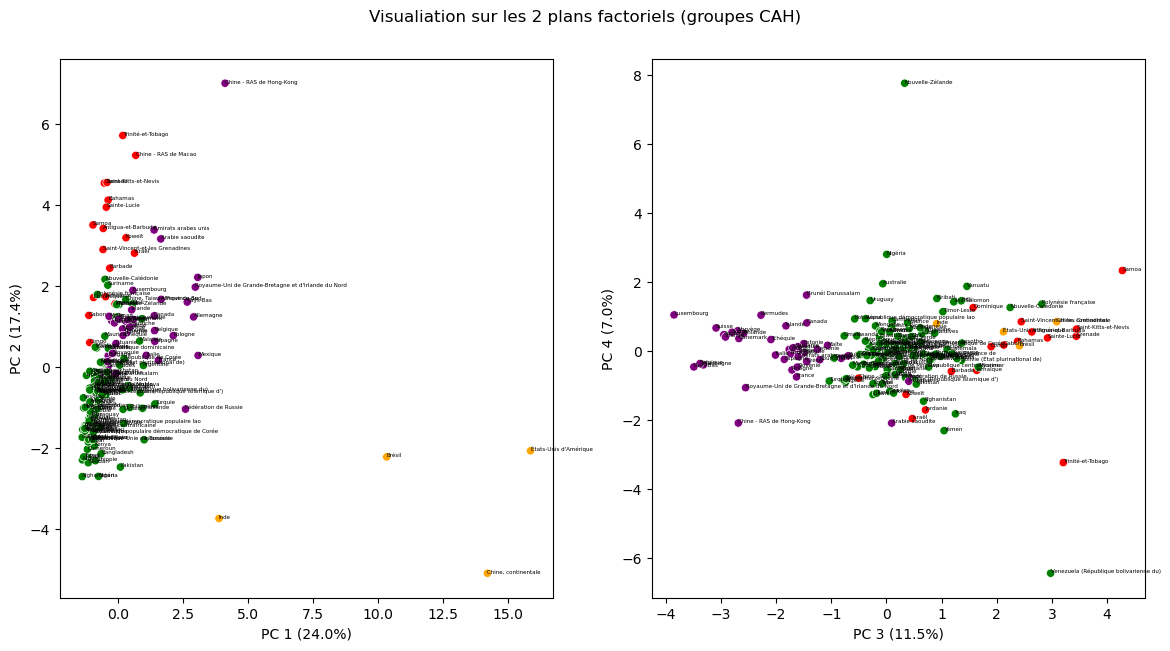

In [70]:
plt.figure(figsize=(14,7))
plt.suptitle('Visualiation sur les 2 plans factoriels (groupes CAH)',y=0.95)

plt.subplot(121)
sns.scatterplot(x=bdd_acp4[:, 0],y=bdd_acp4[:, 1],c=cah_color)

for i, (x,y) in enumerate(zip(bdd_acp4[:,0],bdd_acp4[:,1])):
    plt.text(x,y,bdd.index[i],size=4)

plt.xlabel('PC 1 (24.0%)')
plt.ylabel('PC 2 (17.4%)')

plt.subplot(122)
sns.scatterplot(x=bdd_acp4[:, 2],y=bdd_acp4[:, 3],c=cah_color)

for i, (x,y) in enumerate(zip(bdd_acp4[:,2],bdd_acp4[:,3])):
    plt.text(x,y,bdd.index[i],size=4)

plt.xlabel('PC 3 (11.5%)')
plt.ylabel('PC 4 (7.0%)')

plt.show()

Si on regarde les graphiques sur les 2 plans factoriels, on voit que notre groupe (en violet) se situe plutôt vers le milieu/haut de la PC2 et à bien à gauche de la PC3.

# <font color=#2921CA> IV - Focus sur le groupe final

Pour la dernière partie, on va regarder en détails les pays en commun (en enlevant la France) dans les 2 groupes issus de la CAH et du Kmeans (il y a vait 5 pays en moins et à priori les retirer du groupe final ne devrait pas porter préjudice)

En fonction de certains critères, avantageux ou désavantageux, on va pouvoir affiner notre liste finale et proposer les pays qui semblent être les meilleurs candidats

Effectuer une deuxième CAH sur ce groupe final aurait également pu être pertinent 

In [71]:
bdd = bdd.reset_index()
bdd_final = bdd.loc[(bdd['Pays']!='France')&(bdd['Pays'].isin(groupe_final))]
bdd_final.describe()

,Population,DI vol,Nour vol,Prod vol,Import vol,Export vol,% DI vol,% Nour vol,% Prod vol,% Import vol,% Export vol,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,21676.960343,567.942857,550.542857,571.514286,220.400000,181.371429,1.486306,2.704358,1.576578,1.474195,1.377366,110.300000,95.028571,2.435416,0.756000,47257.548571,2354.577031,3.594639
std,33040.003754,913.300638,878.787545,829.027260,315.994899,322.432673,0.849924,1.380302,1.131245,1.534586,3.088275,16.985374,6.866310,2.577233,0.445198,19157.410923,2621.088788,0.411897
min,63.049000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,87.000000,78.000000,-5.774304,-0.800000,19721.300000,264.600808,2.750901
25%,3514.135500,63.000000,63.500000,54.500000,22.500000,10.500000,1.017292,1.915491,0.793764,0.848698,0.280020,100.000000,91.000000,1.480909,0.530000,33403.300000,997.911842,3.233506
50%,8819.901000,173.000000,162.000000,148.000000,82.000000,35.000000,1.251788,2.529456,1.222316,1.255605,0.620645,106.000000,94.000000,2.232981,0.870000,43559.300000,1370.877921,3.677154
75%,18337.658000,396.500000,401.500000,796.500000,193.500000,173.000000,1.804812,3.218559,2.148822,1.807415,1.101762,116.000000,98.000000,3.710002,1.065000,55222.650000,2005.952231,3.948128
max,127502.725000,4219.000000,4058.000000,3249.000000,1069.000000,1418.000000,4.412924,6.915072,5.405405,9.401887,18.370740,165.000000,114.000000,8.594049,1.350000,114986.000000,9736.095008,4.212983


Pour rappel, notre groupe final de pays présentait plutôt les caractéritisques suivantes :

- PIB hab très élevés
- Import vol élevé
- Distance faible
- Perf logist très élevés
- % Export vol élevé
- Stabi poli élevé

Cependant ce ne sont que des moyennes et en regardant le 'describe', on peut observer par les min ou les max que certains pays ne vérifie pas tout ces critères (ex: Distance à 9736 km, Stabi poli à -0.8, etc...)

Tout d'abord on va procéder à l'élimination de certains pays de notre liste final selon des critères qui me semble défavorables comme une mauvaise stabilité politique, une population trop petite ou alors une distance très éloignée

In [72]:
bdd_final.nsmallest(10,'Stabi poli')

,Pays,Population,DI vol,Nour vol,Prod vol,Import vol,Export vol,% DI vol,% Nour vol,% Prod vol,% Import vol,% Export vol,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
100,Mexique,124777.324,4219.0,4058.0,3249.0,972.0,9.0,2.124018,4.367715,1.772717,2.175081,0.035637,105.0,91.0,8.594049,-0.80,19721.3,9210.212312,3.082015
59,Grèce,10569.450,178.0,162.0,246.0,79.0,29.0,0.851227,1.617412,1.344042,1.007653,0.602660,109.0,93.0,-1.185320,-0.07,28604.9,2098.682094,3.219758
125,Roumanie,19653.969,381.0,381.0,392.0,146.0,69.0,1.032688,1.849964,0.761017,1.804028,0.435002,115.0,94.0,3.791545,0.06,27141.9,1875.527312,3.056560
48,Espagne,46647.428,1497.0,1418.0,1515.0,205.0,212.0,1.520940,3.241810,1.663793,0.492966,0.620645,133.0,87.0,1.271610,0.28,39528.9,1052.519371,3.778706
75,Italie,60673.701,1173.0,1146.0,1315.0,97.0,183.0,1.251788,2.005074,1.660521,0.233949,0.677828,105.0,96.0,1.269531,0.31,41581.1,1108.287142,3.747707
126,Royaume-Uni de Grande-Bretagne et d'Irlande du...,66727.461,2234.0,2131.0,1814.0,779.0,359.0,2.361597,3.531244,2.446854,2.049137,2.449509,103.0,89.0,3.665988,0.39,46372.4,344.136719,4.029834
16,Belgique,11419.748,152.0,144.0,463.0,338.0,656.0,0.471742,1.241058,1.668048,0.868895,2.023567,125.0,83.0,2.240471,0.43,50442.3,264.600808,4.074269
85,Lettonie,1951.097,41.0,41.0,33.0,43.0,20.0,1.297058,2.241662,0.623701,1.711102,0.447027,143.0,90.0,1.874487,0.46,28673.6,1707.614663,3.068554
121,Pologne,37953.180,1156.0,1150.0,2351.0,55.0,1025.0,1.342937,3.313453,2.369052,0.389160,4.304372,165.0,96.0,4.768980,0.52,30064.5,1370.877921,3.482938
37,Chypre,1179.678,38.0,30.0,25.0,14.0,1.0,2.511566,3.731343,2.941176,1.255605,0.258398,105.0,94.0,-5.774304,0.54,38288.0,2954.972339,3.074530


On a 2 pays avec une stabilité politique négative. Pour la Grèce, elle est quasiment nulle et on peut considérer qu'elle est acceptable. Par contre pour le Mexique, il y a un écart conséquent, d'autant plus que si on regarde également le reste des variables, c'est également le pays dont le PIB par habitant est le plus faible, l'inflation est la plus forte et il fait partie des pays les plus éloignés du groupe. 

Étant donné, tout ces crières défavorables, je vais supprimer le Mexique de notre liste finale

In [73]:
bdd_final = bdd_final.drop(100)
bdd_final.nsmallest(15,'Population')

,Pays,Population,DI vol,Nour vol,Prod vol,Import vol,Export vol,% DI vol,% Nour vol,% Prod vol,% Import vol,% Export vol,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
18,Bermudes,63.049,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,106.5,96.0,2.514507,1.00,81835.0,5757.850396,2.750901
73,Islande,334.393,10.0,10.0,10.0,2.0,0.0,1.858736,3.095975,0.584795,0.675676,0.000000,139.0,98.0,-0.053599,1.35,55638.5,2235.750569,3.287803
96,Malte,437.933,14.0,12.0,4.0,9.0,0.0,2.587800,3.069054,2.040816,2.117647,0.000000,101.0,91.0,1.554513,1.25,43559.3,1746.387903,2.939628
89,Luxembourg,591.910,11.0,11.0,0.0,11.0,1.0,1.436031,1.883562,0.000000,1.292597,0.137363,105.0,99.0,1.835926,1.33,114986.0,287.972186,3.924704
37,Chypre,1179.678,38.0,30.0,25.0,14.0,1.0,2.511566,3.731343,2.941176,1.255605,0.258398,105.0,94.0,-5.774304,0.54,38288.0,2954.972339,3.074530
49,Estonie,1319.390,29.0,28.0,20.0,21.0,11.0,1.444943,2.057311,0.687049,2.226935,0.586667,98.0,98.0,5.697814,0.65,33821.9,1863.392871,3.336745
85,Lettonie,1951.097,41.0,41.0,33.0,43.0,20.0,1.297058,2.241662,0.623701,1.711102,0.447027,143.0,90.0,1.874487,0.46,28673.6,1707.614663,3.068554
143,Slovénie,2076.394,52.0,51.0,72.0,20.0,29.0,1.923788,2.681388,3.539823,0.828500,1.665709,100.0,97.0,2.908168,0.87,36507.6,966.948442,3.247254
88,Lituanie,2845.414,82.0,80.0,118.0,44.0,68.0,1.244121,2.622951,1.113523,1.471080,0.991543,113.0,100.0,3.444500,0.78,33761.9,1701.103154,3.325844
41,Croatie,4182.857,45.0,45.0,61.0,24.0,17.0,0.578704,1.055842,0.789849,0.880411,0.679185,100.0,87.0,0.976562,0.69,27154.1,1082.351382,3.130415


Aucun seuil n'a été défini au préalable, j'en fixerai un de manière abitraire

En regardant nos pays les moins peuplés, on a :

- 4 pays sous le million d'habitants (pour le coup il me semble naturel qu'ils ne seront pas garder)

- 5 pays entre 1M et 3M d'habitants (je pense que supprimer également ces pays ne sera pas une mauvaise idée, même si certains d'entre présente de très bons taux en nourriture et/ou importation de volailles)

Je me dis qu'il y a une coupure assez nette entre la Lituanie et la Croatie, cela ne semble pas une mauvaise idée d'enlever tous les pays sous ce seuil des 3M 

In [74]:
bdd_final = bdd_final.drop([18,73,96,89,37,49,85,143,88])
bdd_final.nlargest(10,'Distance')

,Pays,Population,DI vol,Nour vol,Prod vol,Import vol,Export vol,% DI vol,% Nour vol,% Prod vol,% Import vol,% Export vol,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
77,Japon,127502.725,2415.0,2359.0,2215.0,1069.0,10.0,2.206830,3.195308,3.607962,2.133349,0.592066,110.0,96.0,3.754016,1.11,41444.2,9736.095008,4.000232
33,Chine - RAS de Hong-Kong,7306.322,280.0,391.0,24.0,907.0,663.0,4.412924,6.894728,5.405405,9.401887,18.370740,97.0,105.0,1.955990,0.83,59842.2,9645.855848,3.994552
31,Canada,36732.095,1433.0,1433.0,1417.0,182.0,163.0,1.727859,4.221535,1.092083,0.930708,0.246205,87.0,94.0,1.639383,1.10,48317.2,6016.729398,3.830354
169,Émirats arabes unis,9487.203,412.0,412.0,48.0,433.0,94.0,3.493006,6.915072,2.677078,2.889363,1.912902,93.0,104.0,7.225971,0.62,67183.6,5251.803242,3.950884
59,Grèce,10569.450,178.0,162.0,246.0,79.0,29.0,0.851227,1.617412,1.344042,1.007653,0.602660,109.0,93.0,-1.185320,-0.07,28604.9,2098.682094,3.219758
52,Finlande,5511.371,111.0,103.0,129.0,16.0,12.0,1.093165,1.701917,1.482248,0.532092,0.620476,118.0,89.0,1.512813,1.08,47570.1,1913.222367,3.945372
125,Roumanie,19653.969,381.0,381.0,392.0,146.0,69.0,1.032688,1.849964,0.761017,1.804028,0.435002,115.0,94.0,3.791545,0.06,27141.9,1875.527312,3.056560
148,Suède,9904.896,187.0,164.0,157.0,84.0,23.0,1.110517,1.782609,1.047016,1.058068,0.425847,112.0,92.0,2.306442,0.98,51948.0,1547.146570,4.127296
123,Portugal,10288.527,325.0,315.0,361.0,82.0,44.0,1.750889,2.939530,2.868722,0.685103,0.835549,106.0,91.0,1.449005,1.12,33044.7,1453.608068,3.524684
121,Pologne,37953.180,1156.0,1150.0,2351.0,55.0,1025.0,1.342937,3.313453,2.369052,0.389160,4.304372,165.0,96.0,4.768980,0.52,30064.5,1370.877921,3.482938


Il reste 4 pays hors Europe, qui sont logiquement les plus éloignés, ce peut-être une critère décisif et dans mon cas je vais enlever ces pays même si chacun d'entre eux avait d'autres caractéristiques intéressantes

In [75]:
bdd_final = bdd_final.drop([31,33,77,169])
bdd_final.nsmallest(10,'% Import vol')

,Pays,Population,DI vol,Nour vol,Prod vol,Import vol,Export vol,% DI vol,% Nour vol,% Prod vol,% Import vol,% Export vol,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
109,Norvège,5296.326,102.0,101.0,101.0,2.0,0.0,1.044761,2.039992,1.222316,0.039370,0.000000,97.0,94.0,2.576809,1.17,64050.8,1344.019375,3.716082
75,Italie,60673.701,1173.0,1146.0,1315.0,97.0,183.0,1.251788,2.005074,1.660521,0.233949,0.677828,105.0,96.0,1.269531,0.31,41581.1,1108.287142,3.747707
121,Pologne,37953.180,1156.0,1150.0,2351.0,55.0,1025.0,1.342937,3.313453,2.369052,0.389160,4.304372,165.0,96.0,4.768980,0.52,30064.5,1370.877921,3.482938
48,Espagne,46647.428,1497.0,1418.0,1515.0,205.0,212.0,1.520940,3.241810,1.663793,0.492966,0.620645,133.0,87.0,1.271610,0.28,39528.9,1052.519371,3.778706
52,Finlande,5511.371,111.0,103.0,129.0,16.0,12.0,1.093165,1.701917,1.482248,0.532092,0.620476,118.0,89.0,1.512813,1.08,47570.1,1913.222367,3.945372
123,Portugal,10288.527,325.0,315.0,361.0,82.0,44.0,1.750889,2.939530,2.868722,0.685103,0.835549,106.0,91.0,1.449005,1.12,33044.7,1453.608068,3.524684
16,Belgique,11419.748,152.0,144.0,463.0,338.0,656.0,0.471742,1.241058,1.668048,0.868895,2.023567,125.0,83.0,2.240471,0.43,50442.3,264.600808,4.074269
41,Croatie,4182.857,45.0,45.0,61.0,24.0,17.0,0.578704,1.055842,0.789849,0.880411,0.679185,100.0,87.0,0.976562,0.69,27154.1,1082.351382,3.130415
59,Grèce,10569.450,178.0,162.0,246.0,79.0,29.0,0.851227,1.617412,1.344042,1.007653,0.602660,109.0,93.0,-1.185320,-0.07,28604.9,2098.682094,3.219758
119,Pays-Bas,17021.347,372.0,346.0,1100.0,608.0,1418.0,0.738550,2.150003,2.256827,1.014991,2.408411,123.0,114.0,2.232981,0.92,55088.6,430.886817,4.103765


In [76]:
bdd_final.nsmallest(10,'Import vol')

,Pays,Population,DI vol,Nour vol,Prod vol,Import vol,Export vol,% DI vol,% Nour vol,% Prod vol,% Import vol,% Export vol,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist
109,Norvège,5296.326,102.0,101.0,101.0,2.0,0.0,1.044761,2.039992,1.222316,0.039370,0.000000,97.0,94.0,2.576809,1.17,64050.8,1344.019375,3.716082
52,Finlande,5511.371,111.0,103.0,129.0,16.0,12.0,1.093165,1.701917,1.482248,0.532092,0.620476,118.0,89.0,1.512813,1.08,47570.1,1913.222367,3.945372
41,Croatie,4182.857,45.0,45.0,61.0,24.0,17.0,0.578704,1.055842,0.789849,0.880411,0.679185,100.0,87.0,0.976562,0.69,27154.1,1082.351382,3.130415
146,Suisse,8455.804,133.0,133.0,91.0,51.0,4.0,1.033331,1.692112,0.902241,1.024508,0.197044,91.0,102.0,1.045885,1.26,69103.6,490.305157,3.943579
121,Pologne,37953.180,1156.0,1150.0,2351.0,55.0,1025.0,1.342937,3.313453,2.369052,0.389160,4.304372,165.0,96.0,4.768980,0.52,30064.5,1370.877921,3.482938
67,Hongrie,9729.823,266.0,246.0,493.0,58.0,210.0,1.502231,3.298471,1.798154,1.430333,1.449876,138.0,108.0,4.477600,0.81,29501.1,1247.895864,3.424484
142,Slovaquie,5447.900,74.0,76.0,71.0,63.0,35.0,1.001895,2.026667,0.883524,1.585703,0.740741,117.0,78.0,6.719054,0.91,30061.6,1091.707532,3.183448
59,Grèce,10569.450,178.0,162.0,246.0,79.0,29.0,0.851227,1.617412,1.344042,1.007653,0.602660,109.0,93.0,-1.185320,-0.07,28604.9,2098.682094,3.219758
123,Portugal,10288.527,325.0,315.0,361.0,82.0,44.0,1.750889,2.939530,2.868722,0.685103,0.835549,106.0,91.0,1.449005,1.12,33044.7,1453.608068,3.524684
148,Suède,9904.896,187.0,164.0,157.0,84.0,23.0,1.110517,1.782609,1.047016,1.058068,0.425847,112.0,92.0,2.306442,0.98,51948.0,1547.146570,4.127296


La quantité et le taux d'importation de volailles sont aussi des critères importants à regarder.

La Norvège a une quantité et un taux d'importation de volaille très faibles, on peut aussi le considérer comme une mauvais candidat

Il y a la Finlande, à moindre degré par rapport à la Norvège, mais avec également un taux et des quantités faible

Puis la Pologne qui se montre comme un très grand producteur/exportateur de volailles mais qui n'importe très peu

Je pense qu'on peut supprimer ces 3 pays, pour les autres les résultats ne sont pas les meilleurs mais reste une destination envisageable

In [77]:
bdd_final = bdd_final.drop([52,109,121])
bdd_final.shape

(18, 19)

A ce stade, notre liste ne comporte plus que 18 candidats. Maintenant plutôt que de supprimer des pays en raison de critères "défavorables". On va maintenant établir une liste des meilleurs candidats

Ce qui peut-être intéressant, c'est de regarder le différentiel entre Import et Export et ne garder que ceux en positif, également ceux qui présente une hausse en quantité d'importation depuis ces 2 dernières années.

In [78]:
bdd_final['diff Import-Export'] = bdd_final['Import vol'] - bdd_final['Export vol']

In [79]:
list_fin_2c = bdd_final.loc[(bdd_final['diff Import-Export']>=0)&(bdd_final['Ind qte import']>=100)]
list_fin_2c.nlargest(10,'diff Import-Export')

,Pays,Population,DI vol,Nour vol,Prod vol,Import vol,Export vol,% DI vol,% Nour vol,% Prod vol,% Import vol,% Export vol,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist,diff Import-Export
126,Royaume-Uni de Grande-Bretagne et d'Irlande du...,66727.461,2234.0,2131.0,1814.0,779.0,359.0,2.361597,3.531244,2.446854,2.049137,2.449509,103.0,89.0,3.665988,0.39,46372.4,344.136719,4.029834,420.0
4,Allemagne,82658.409,1739.0,1609.0,1514.0,842.0,646.0,0.993941,2.063138,0.902114,1.265214,1.098770,112.0,95.0,2.616279,0.59,53071.5,880.634838,4.212983,196.0
152,Tchéquie,10641.034,249.0,234.0,163.0,116.0,27.0,1.205753,2.529456,0.726835,1.810802,0.301642,101.0,93.0,4.492188,1.00,38824.9,884.671277,3.677154,89.0
125,Roumanie,19653.969,381.0,381.0,392.0,146.0,69.0,1.032688,1.849964,0.761017,1.804028,0.435002,115.0,94.0,3.791545,0.06,27141.9,1875.527312,3.056560,77.0
148,Suède,9904.896,187.0,164.0,157.0,84.0,23.0,1.110517,1.782609,1.047016,1.058068,0.425847,112.0,92.0,2.306442,0.98,51948.0,1547.146570,4.127296,61.0
59,Grèce,10569.450,178.0,162.0,246.0,79.0,29.0,0.851227,1.617412,1.344042,1.007653,0.602660,109.0,93.0,-1.185320,-0.07,28604.9,2098.682094,3.219758,50.0
123,Portugal,10288.527,325.0,315.0,361.0,82.0,44.0,1.750889,2.939530,2.868722,0.685103,0.835549,106.0,91.0,1.449005,1.12,33044.7,1453.608068,3.524684,38.0
142,Slovaquie,5447.900,74.0,76.0,71.0,63.0,35.0,1.001895,2.026667,0.883524,1.585703,0.740741,117.0,78.0,6.719054,0.91,30061.6,1091.707532,3.183448,28.0
41,Croatie,4182.857,45.0,45.0,61.0,24.0,17.0,0.578704,1.055842,0.789849,0.880411,0.679185,100.0,87.0,0.976562,0.69,27154.1,1082.351382,3.130415,7.0


Ici il me reste une liste réduite de pays pour établir un choix final

Evidemment, c'est un choix de filtrage selon certains critères, qui ne sont pas forcément les meilleurs, mais cela permet d'avoir une petite liste de pays vérifiant certains critères. Naturellement, en ajoutant ou en supprimant certains critères à partir d'une meilleure connaissance du sujet, on aurait une autre liste de pays.

Par exemple, je peux également décider d'ajouter un cirtère supplémentaire en me disant que cela serait bien de garder les pays dont le taux de nourriture en volailles est supérieur à 2%

In [80]:
list_fin_3c = bdd_final.loc[(bdd_final['diff Import-Export']>=0)&(bdd_final['Ind qte import']>=100)&(bdd_final['% Nour vol']>=2)]
list_fin_3c.nlargest(10,'diff Import-Export')

,Pays,Population,DI vol,Nour vol,Prod vol,Import vol,Export vol,% DI vol,% Nour vol,% Prod vol,% Import vol,% Export vol,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist,diff Import-Export
126,Royaume-Uni de Grande-Bretagne et d'Irlande du...,66727.461,2234.0,2131.0,1814.0,779.0,359.0,2.361597,3.531244,2.446854,2.049137,2.449509,103.0,89.0,3.665988,0.39,46372.4,344.136719,4.029834,420.0
4,Allemagne,82658.409,1739.0,1609.0,1514.0,842.0,646.0,0.993941,2.063138,0.902114,1.265214,1.098770,112.0,95.0,2.616279,0.59,53071.5,880.634838,4.212983,196.0
152,Tchéquie,10641.034,249.0,234.0,163.0,116.0,27.0,1.205753,2.529456,0.726835,1.810802,0.301642,101.0,93.0,4.492188,1.00,38824.9,884.671277,3.677154,89.0
123,Portugal,10288.527,325.0,315.0,361.0,82.0,44.0,1.750889,2.939530,2.868722,0.685103,0.835549,106.0,91.0,1.449005,1.12,33044.7,1453.608068,3.524684,38.0
142,Slovaquie,5447.900,74.0,76.0,71.0,63.0,35.0,1.001895,2.026667,0.883524,1.585703,0.740741,117.0,78.0,6.719054,0.91,30061.6,1091.707532,3.183448,28.0


In [81]:
list_fin_2c['Pays'].unique()

array(['Allemagne', 'Croatie', 'Grèce', 'Portugal', 'Roumanie',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Slovaquie',
       'Suède', 'Tchéquie'], dtype=object)

In [82]:
list_fin_3c['Pays'].unique()

array(['Allemagne', 'Portugal',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Slovaquie',
       'Tchéquie'], dtype=object)

In [83]:
bdd_final

,Pays,Population,DI vol,Nour vol,Prod vol,Import vol,Export vol,% DI vol,% Nour vol,% Prod vol,% Import vol,% Export vol,Ind qte import,Ind val unit import,Inflation,Stabi poli,PIB hab,Distance,Perf logist,diff Import-Export
4,Allemagne,82658.409,1739.0,1609.0,1514.0,842.0,646.0,0.993941,2.063138,0.902114,1.265214,1.098770,112.0,95.0,2.616279,0.59,53071.5,880.634838,4.212983,196.0
11,Autriche,8819.901,173.0,160.0,148.0,110.0,78.0,0.900854,1.947420,0.842345,1.159726,0.997060,94.0,98.0,1.955034,1.05,54173.0,1036.711400,4.063993,32.0
16,Belgique,11419.748,152.0,144.0,463.0,338.0,656.0,0.471742,1.241058,1.668048,0.868895,2.023567,125.0,83.0,2.240471,0.43,50442.3,264.600808,4.074269,-318.0
41,Croatie,4182.857,45.0,45.0,61.0,24.0,17.0,0.578704,1.055842,0.789849,0.880411,0.679185,100.0,87.0,0.976562,0.69,27154.1,1082.351382,3.130415,7.0
44,Danemark,5732.274,167.0,166.0,173.0,133.0,139.0,0.832088,3.009973,0.660911,1.851336,1.104753,107.0,93.0,1.577909,0.87,55356.7,1028.875241,3.902897,-6.0
48,Espagne,46647.428,1497.0,1418.0,1515.0,205.0,212.0,1.520940,3.241810,1.663793,0.492966,0.620645,133.0,87.0,1.271610,0.28,39528.9,1052.519371,3.778706,-7.0
59,Grèce,10569.450,178.0,162.0,246.0,79.0,29.0,0.851227,1.617412,1.344042,1.007653,0.602660,109.0,93.0,-1.185320,-0.07,28604.9,2098.682094,3.219758,50.0
67,Hongrie,9729.823,266.0,246.0,493.0,58.0,210.0,1.502231,3.298471,1.798154,1.430333,1.449876,138.0,108.0,4.477600,0.81,29501.1,1247.895864,3.424484,-152.0
72,Irlande,4753.279,128.0,123.0,110.0,99.0,93.0,1.132443,2.637787,0.797679,1.303832,0.990626,87.0,101.0,-1.693222,1.00,77749.2,780.840481,3.652443,6.0
75,Italie,60673.701,1173.0,1146.0,1315.0,97.0,183.0,1.251788,2.005074,1.660521,0.233949,0.677828,105.0,96.0,1.269531,0.31,41581.1,1108.287142,3.747707,-86.0


In [84]:
tier1 = bdd_final['Pays'].loc[(bdd_final['diff Import-Export']>=0)&(bdd_final['Ind qte import']>=100)&(bdd_final['% Nour vol']>=2)]
tier2 = bdd_final['Pays'].loc[(bdd_final['diff Import-Export']>=0)&(bdd_final['Ind qte import']>=100)&(bdd_final['% Nour vol']<2)]
tier3 = bdd_final['Pays'].loc[(bdd_final['diff Import-Export']<0)|(bdd_final['Ind qte import']<100)]

In [85]:
print('Liste Tier 1 :\n\n',tier1,'\n\nListe Tier 2 :\n\n',tier2,'\n\nListe Tier 3 :\n\n',tier3)

Liste Tier 1 :

 4                                              Allemagne
123                                             Portugal
126    Royaume-Uni de Grande-Bretagne et d'Irlande du...
142                                            Slovaquie
152                                             Tchéquie
Name: Pays, dtype: object 

Liste Tier 2 :

 41      Croatie
59        Grèce
125    Roumanie
148       Suède
Name: Pays, dtype: object 

Liste Tier 3 :

 11     Autriche
16     Belgique
44     Danemark
48      Espagne
67      Hongrie
72      Irlande
75       Italie
119    Pays-Bas
146      Suisse
Name: Pays, dtype: object


En fonction des critères qui nous intéresse le plus, on peut donc encore une fois classer nos pays en différents groupes (ici des tier list qui classifie du meilleur au pire) et offrir différentes options pour le choix final

# <font color=#2921CA> Conclusion
    
    
Pour mener cette étude, j'avais à disposition un fichier avec des données sur la disponibilité alimentaire et un fichier avec des données sur la population. N'ayant pas assez de critères pertinents justifiant le choix final d'un pays, j'ai dû ajouter des variables à ma base de données, ce qui m'a apporter quelques problématiques au niveau de l'écriture des pays et au niveau des valeurs manquantes. Une fois, ces problèmes réglés, je disposais d'une base de donnée avec 174 pays et 18 variables.
    
Ensuite, j'ai commencé à travailler sur cette base de données, avec tout d'abord une analyse exploratoire afin d'obtenir le plus d'informations utiles. En particulier, la répartition et la variation des variables étaient importantes, leurs outliers également, avec pour certaines, des valeurs très aberrantes (pouvant avoir une influence importante lors des classifications). Puis pour finir l'analyse l'exploratoire, on a pu identifier des corrélations, plus ou moins importantes, entre certaines variables.
      
Après l'analyse exploratoire, j'ai utilisé différentes méthodes de classifications (CAH, puis K-means pour comparer les résultats) afin d'obtenir un groupe propice pour l'objectif final, le choix d'un pays dans lequel l'entreprise pourrait lancer son développement à l'international.
    
Les résultats de la CAH m'ont fait pencher pour une classification en 4 groupes, car au-delà, les groupes supplémentaires proposés étaient composé de 1 ou 2 pays (du fait des outliers aberrants). Parmi ces 4 groupes, il y en a un qui ressortait avec des caractéristiques nettement favorables par rapport aux autres groupes.
    
Cependant, lorsque j'ai utilisé la méthode des K-means, j'ai pu constasté, via des mesures statistiques, que pour cette méthode, 4 était loin d'être le nombre de groupe optimal (2 ou 9 semblait plus appropriés, voire 7). Néanmoins, avec 4 groupes, j'ai pu retrouvé des résultats plutôt cohérent avec ceux de la CAH et j'ai décidé de garder tous les pays communs de ces 2 méthodes comme groupe final.
    
Afin de mieux comprendre les visualtions sur les plans factoriels de mes données (et des groupes), j'ai effectué une ACP, ce qui m'a permis d'obtenir la composition (par les variables) des composantes principales des plans factoriels.
    
Pour finir, j'ai étudié le groupe final obtenu par la CAH et la K-means, afin d'obtenir une liste réduite des meilleurs cibles.
A partir de certains critères (défavorables ou favorables) déterminés de manière arbitraire, j'ai établi une tier liste à 3 niveaux des meilleurs pays pour l'objectif final :
    
- Tier 1 :
    
    - Allemagne
    - Portugal
    - Royaume-Uni
    - Slovaquie
    - Tchéquie

    
- Tier 2 :
    
    - Croatie
    - Grèce
    - Roumanie
    - Suède
    
    
- Tier 3 : 
    
    - Autriche
    - Belgique
    - Danemark
    - Espagne
    - Hongrie
    - Irlande
    - Italie
    - Pays-Bas
    - Suisse
